In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.stats as stats

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
train_x = pd.read_csv('/content/train.csv')
train_org = train_x.copy()

In [ ]:
train_x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_x.loc[:,['SalePrice','LotArea']].describe()

,SalePrice,LotArea
count,1460.000000,1460.000000
mean,180921.195890,10516.828082
std,79442.502883,9981.264932
min,34900.000000,1300.000000
25%,129975.000000,7553.500000
50%,163000.000000,9478.500000
75%,214000.000000,11601.500000
max,755000.000000,215245.000000


In [ ]:
num_cols = ['SalePrice','LotArea']

In [ ]:
def display_stat():
    for i in range(2):
        mean = train_x[num_cols[i]].mean()
        std = train_x[num_cols[i]].std()
        skew = train_x[num_cols[i]].skew()
        kurtosis = train_x[num_cols[i]].kurtosis()
        print(num_cols[i]+':')
        print('mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}, kurtosis: {3:.4f} '.format(mean, std, skew, kurtosis))

<Figure size 1440x1800 with 0 Axes>

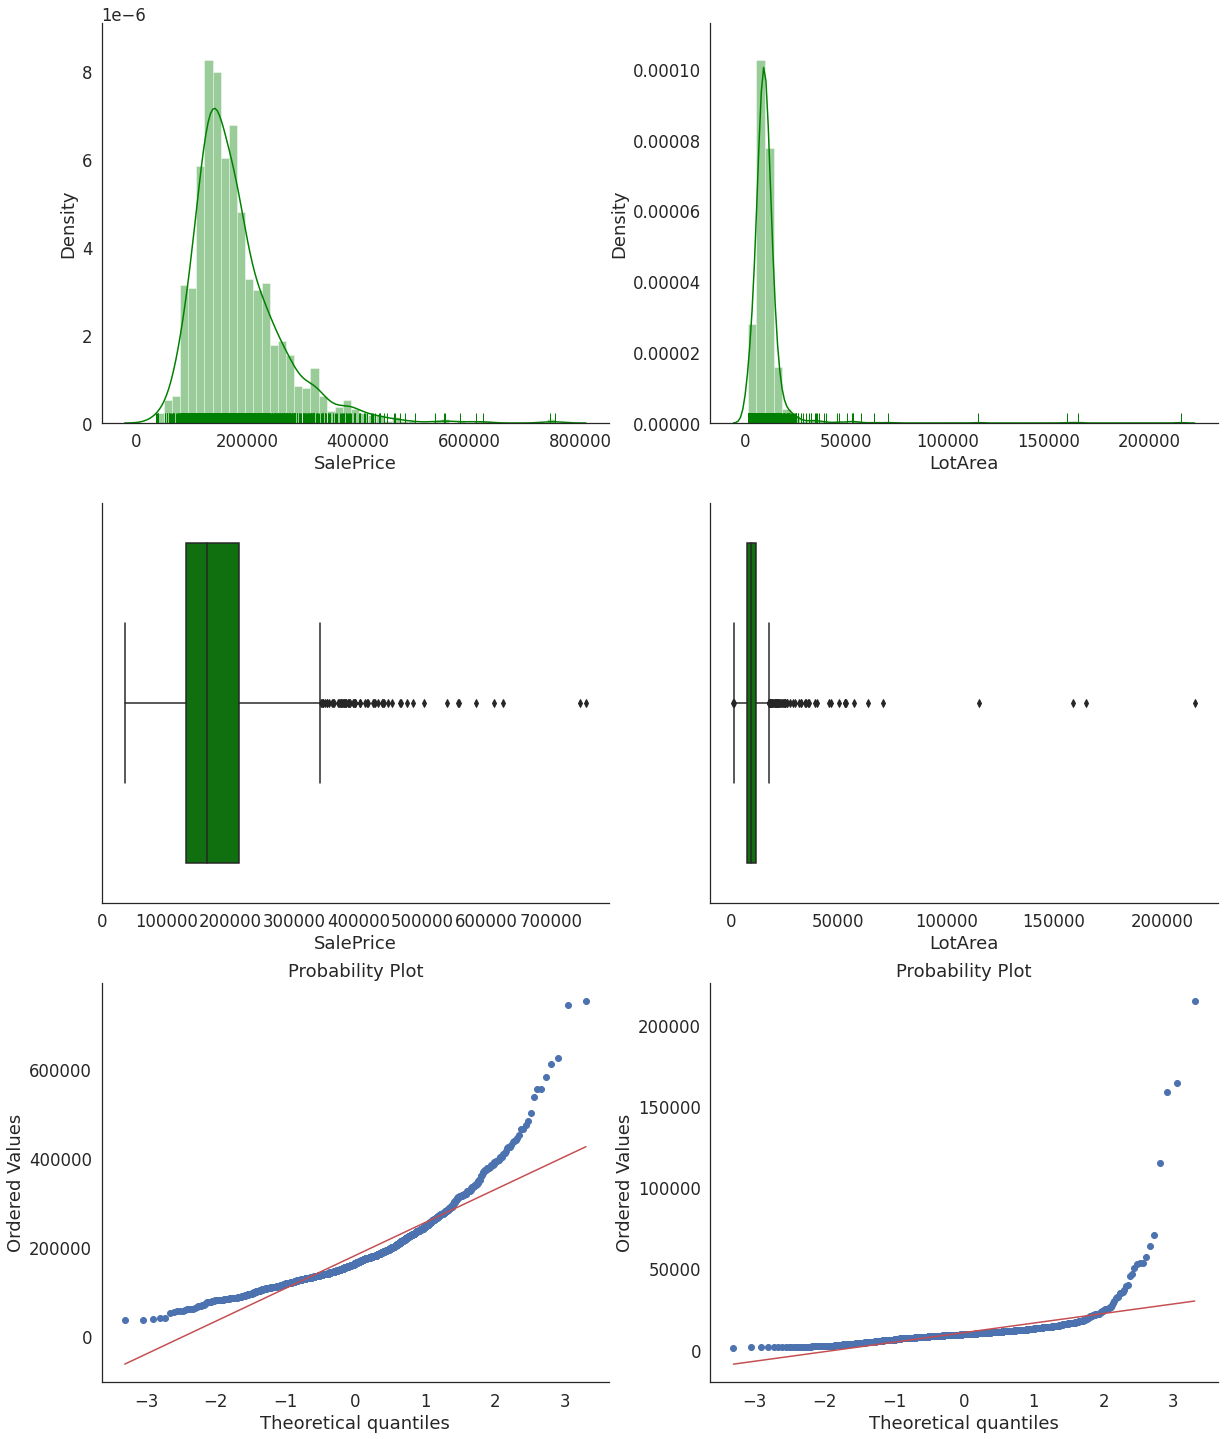

In [ ]:
rcParams['figure.figsize'] = 20,25
sns.set(font_scale = 1.5)
sns.set_style("white")
plt.subplots_adjust(hspace=1)
fig, axes = plt.subplots(3, 2)
for i in range(2):
    sns.distplot(train_x[num_cols[i]],ax = axes[0,i],rug=True,color='green')
    sns.boxplot(train_x[num_cols[i]],ax = axes[1,i],color='green')  
    stats.probplot(train_x[num_cols[i]],plot = axes[2,i])
    sns.despine()

In [ ]:
display_stat()

SalePrice:
mean: 180921.1959, std: 79442.5029, skew: 1.8829, kurtosis: 6.5363 
LotArea:
mean: 10516.8281, std: 9981.2649, skew: 12.2077, kurtosis: 203.2433 


Text(0.5, 1.0, 'Orginal')

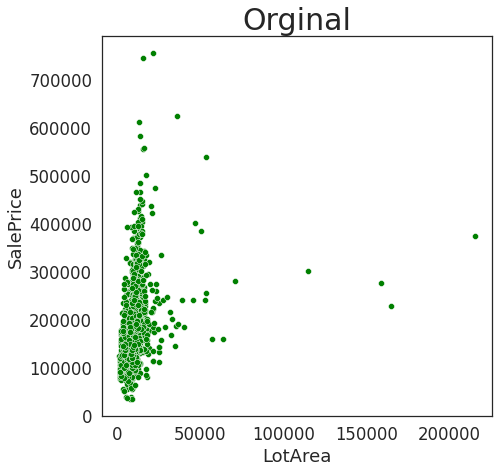

In [ ]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("bright")
rcParams['figure.figsize'] = 7,7
ax1 = plt.subplot(1,1,1)
sns.scatterplot(data=train_org, y="SalePrice", x="LotArea",ax=ax1,color='green')
ax1.set_title('Orginal',fontsize=30)

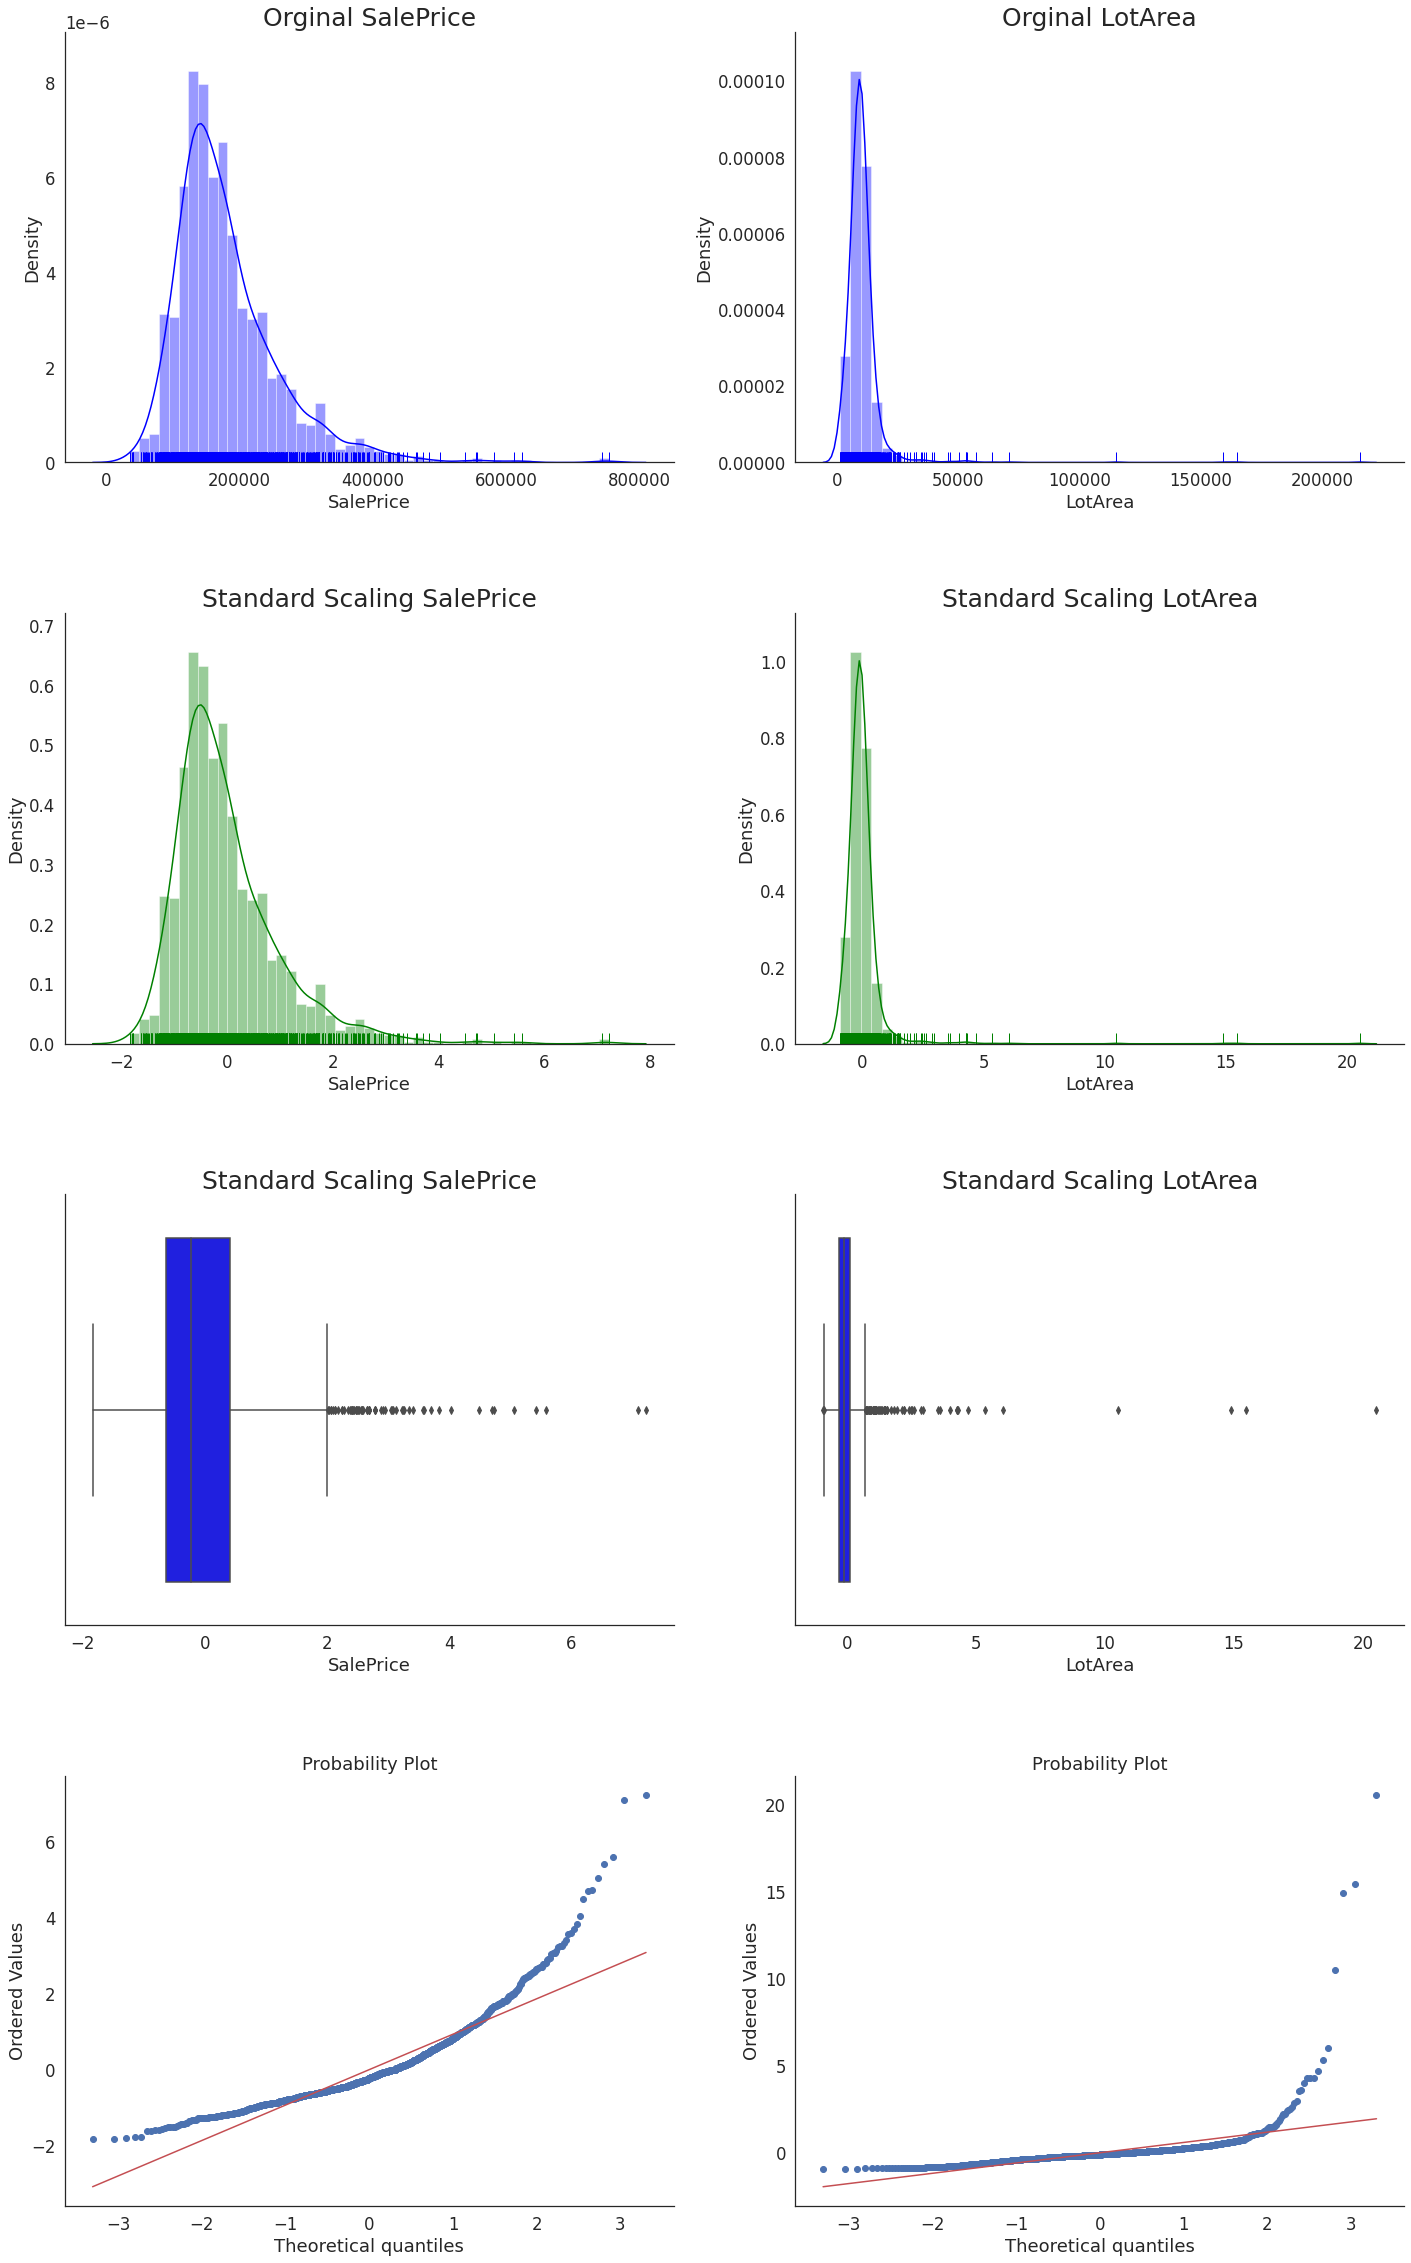

In [ ]:
from sklearn.preprocessing import StandardScaler
train_x = train_org.copy()
rcParams['figure.figsize'] = 24,40
fig, axes = plt.subplots(4, 2)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.35)
for i in range(2):
    scaler = StandardScaler()
    train_x.loc[:,num_cols[i]] = scaler.fit_transform(train_x.loc[:,[num_cols[i]]])
    sns.distplot(train_org.loc[:,num_cols[i]],ax=axes[0,i],rug=True,color='blue')
    axes[0,i].set_title('Orginal '+num_cols[i],fontsize=25)
    sns.distplot(train_x.loc[:,num_cols[i]],ax=axes[1,i],rug=True,color='green')
    axes[1,i].set_title('Standard Scaling '+num_cols[i],fontsize=25)
    sns.boxplot(train_x.loc[:,num_cols[i]],ax=axes[2,i],color='blue')
    axes[2,i].set_title('Standard Scaling '+num_cols[i],fontsize=25)
    stats.probplot(train_x[num_cols[i]],plot = axes[3,i])
    sns.despine()

In [ ]:
display_stat()

SalePrice:
mean: 0.0000, std: 1.0003, skew: 1.8829, kurtosis: 6.5363 
LotArea:
mean: -0.0000, std: 1.0003, skew: 12.2077, kurtosis: 203.2433 


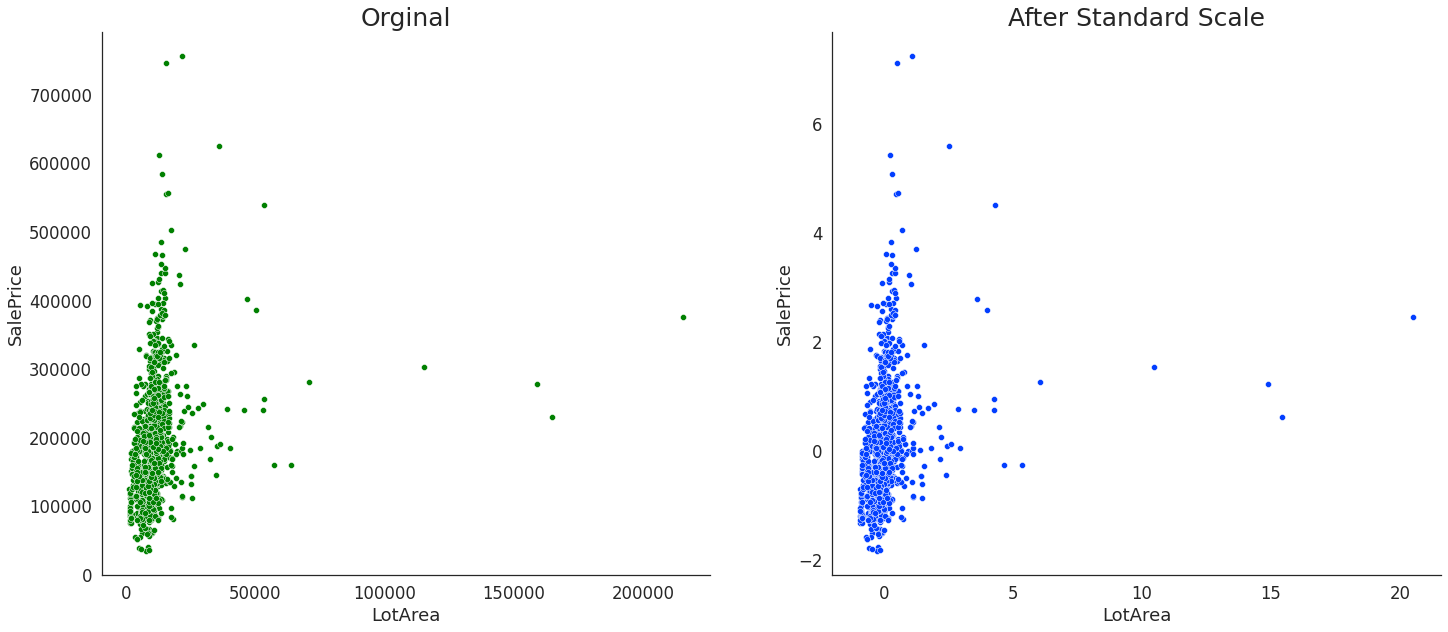

In [ ]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("bright")
rcParams['figure.figsize'] = 24,10
ax1 = plt.subplot(1,2,1)  
ax2 = plt.subplot(1,2,2)  
sns.scatterplot(data=train_org, y="SalePrice", x="LotArea",ax=ax1,color='green')
ax1.set_title('Orginal',fontsize=25)
sns.scatterplot(data =train_x, y="SalePrice", x="LotArea",ax=ax2)
ax2.set_title('After Standard Scale',fontsize=25)
sns.despine()

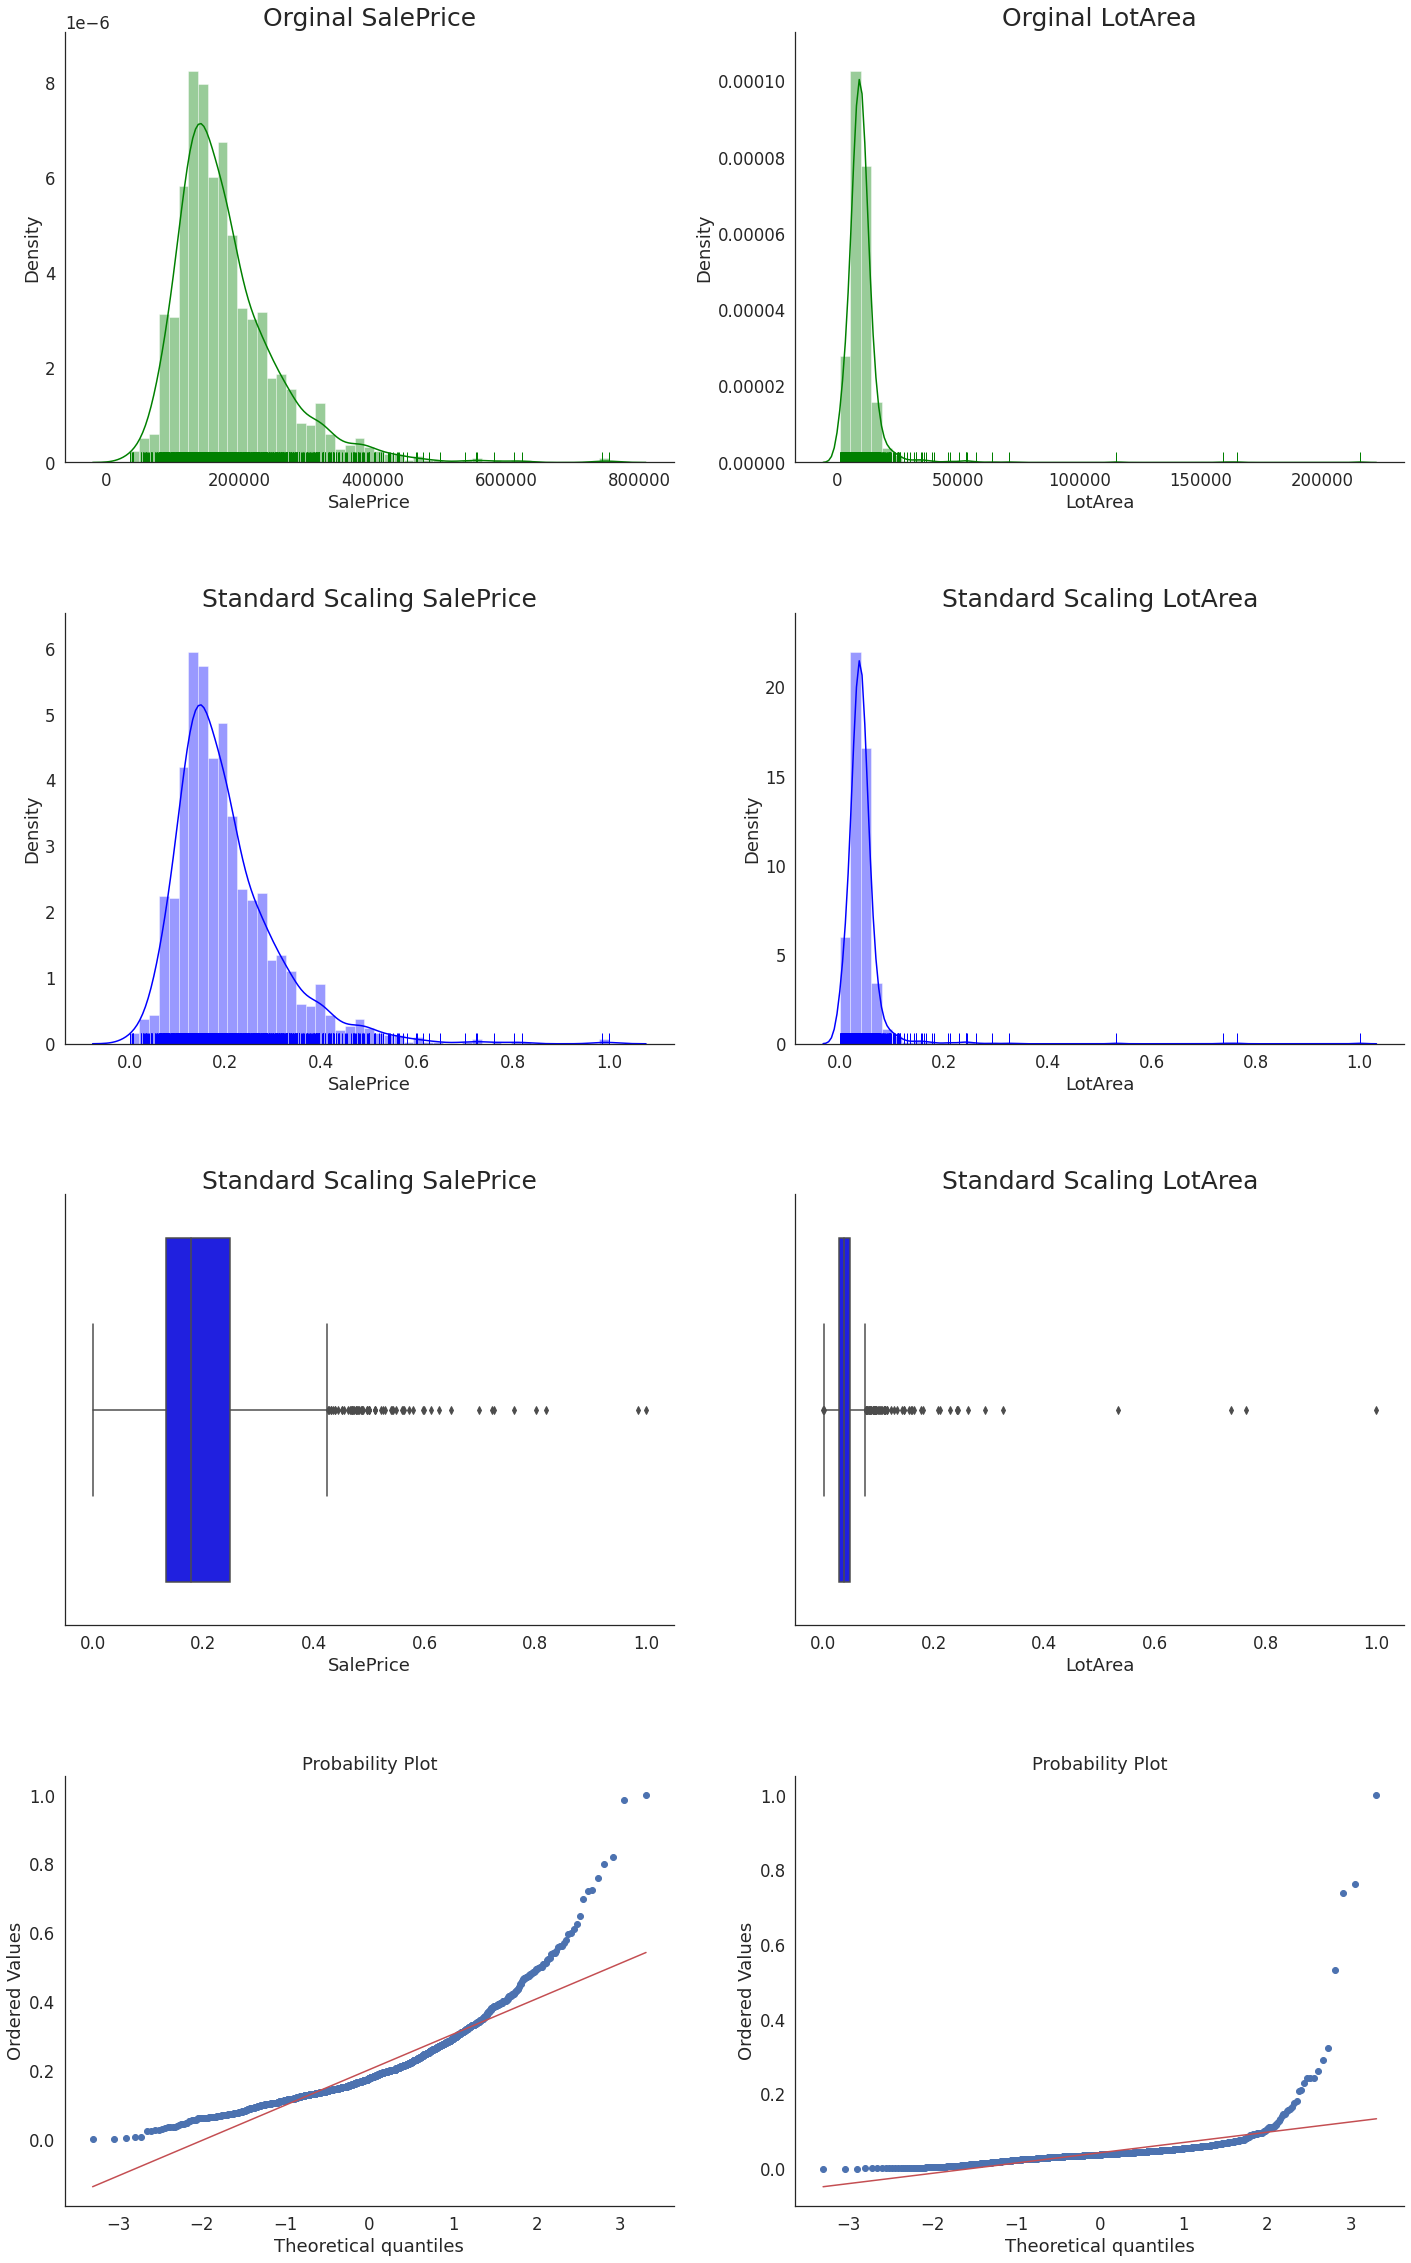

In [ ]:
from sklearn.preprocessing import MinMaxScaler
train_x = train_org.copy()
rcParams['figure.figsize'] = 24,40
fig, axes = plt.subplots(4, 2)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.35)

scaler = MinMaxScaler()
for i in range(2):
    train_x.loc[:,num_cols[i]] = scaler.fit_transform(train_x[[num_cols[i]]])
    sns.distplot(train_org.loc[:,num_cols[i]],ax=axes[0,i],rug=True,color='green')
    axes[0,i].set_title('Orginal '+num_cols[i],fontsize=25)
    sns.distplot(train_x.loc[:,num_cols[i]],ax=axes[1,i],rug=True,color='blue')
    axes[1,i].set_title('Standard Scaling '+num_cols[i],fontsize=25)
    sns.boxplot(train_x.loc[:,num_cols[i]],ax=axes[2,i],color='blue')
    axes[2,i].set_title('Standard Scaling '+num_cols[i],fontsize=25)
    stats.probplot(train_x[num_cols[i]],plot = axes[3,i])
    sns.despine()

In [ ]:
display_stat()

SalePrice:
mean: 0.2028, std: 0.1103, skew: 1.8829, kurtosis: 6.5363 
LotArea:
mean: 0.0431, std: 0.0467, skew: 12.2077, kurtosis: 203.2433 


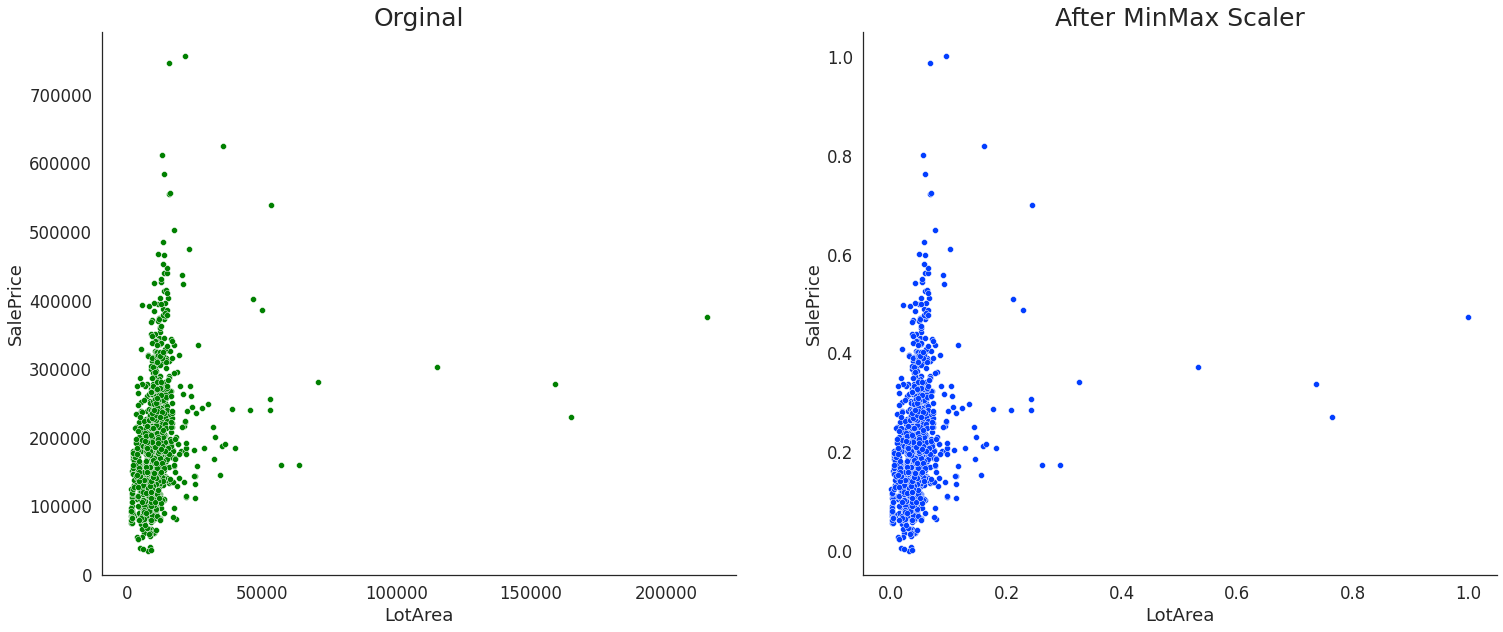

In [ ]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("bright")
rcParams['figure.figsize'] = 25,10
ax1 = plt.subplot(1,2,1)  
ax2 = plt.subplot(1,2,2)  
sns.scatterplot(data=train_org, y="SalePrice", x="LotArea",ax=ax1,color='green')
ax1.set_title('Orginal',fontsize=25)
sns.scatterplot(data =train_x, y="SalePrice", x="LotArea",ax=ax2)
ax2.set_title('After MinMax Scaler',fontsize=25)
sns.despine()

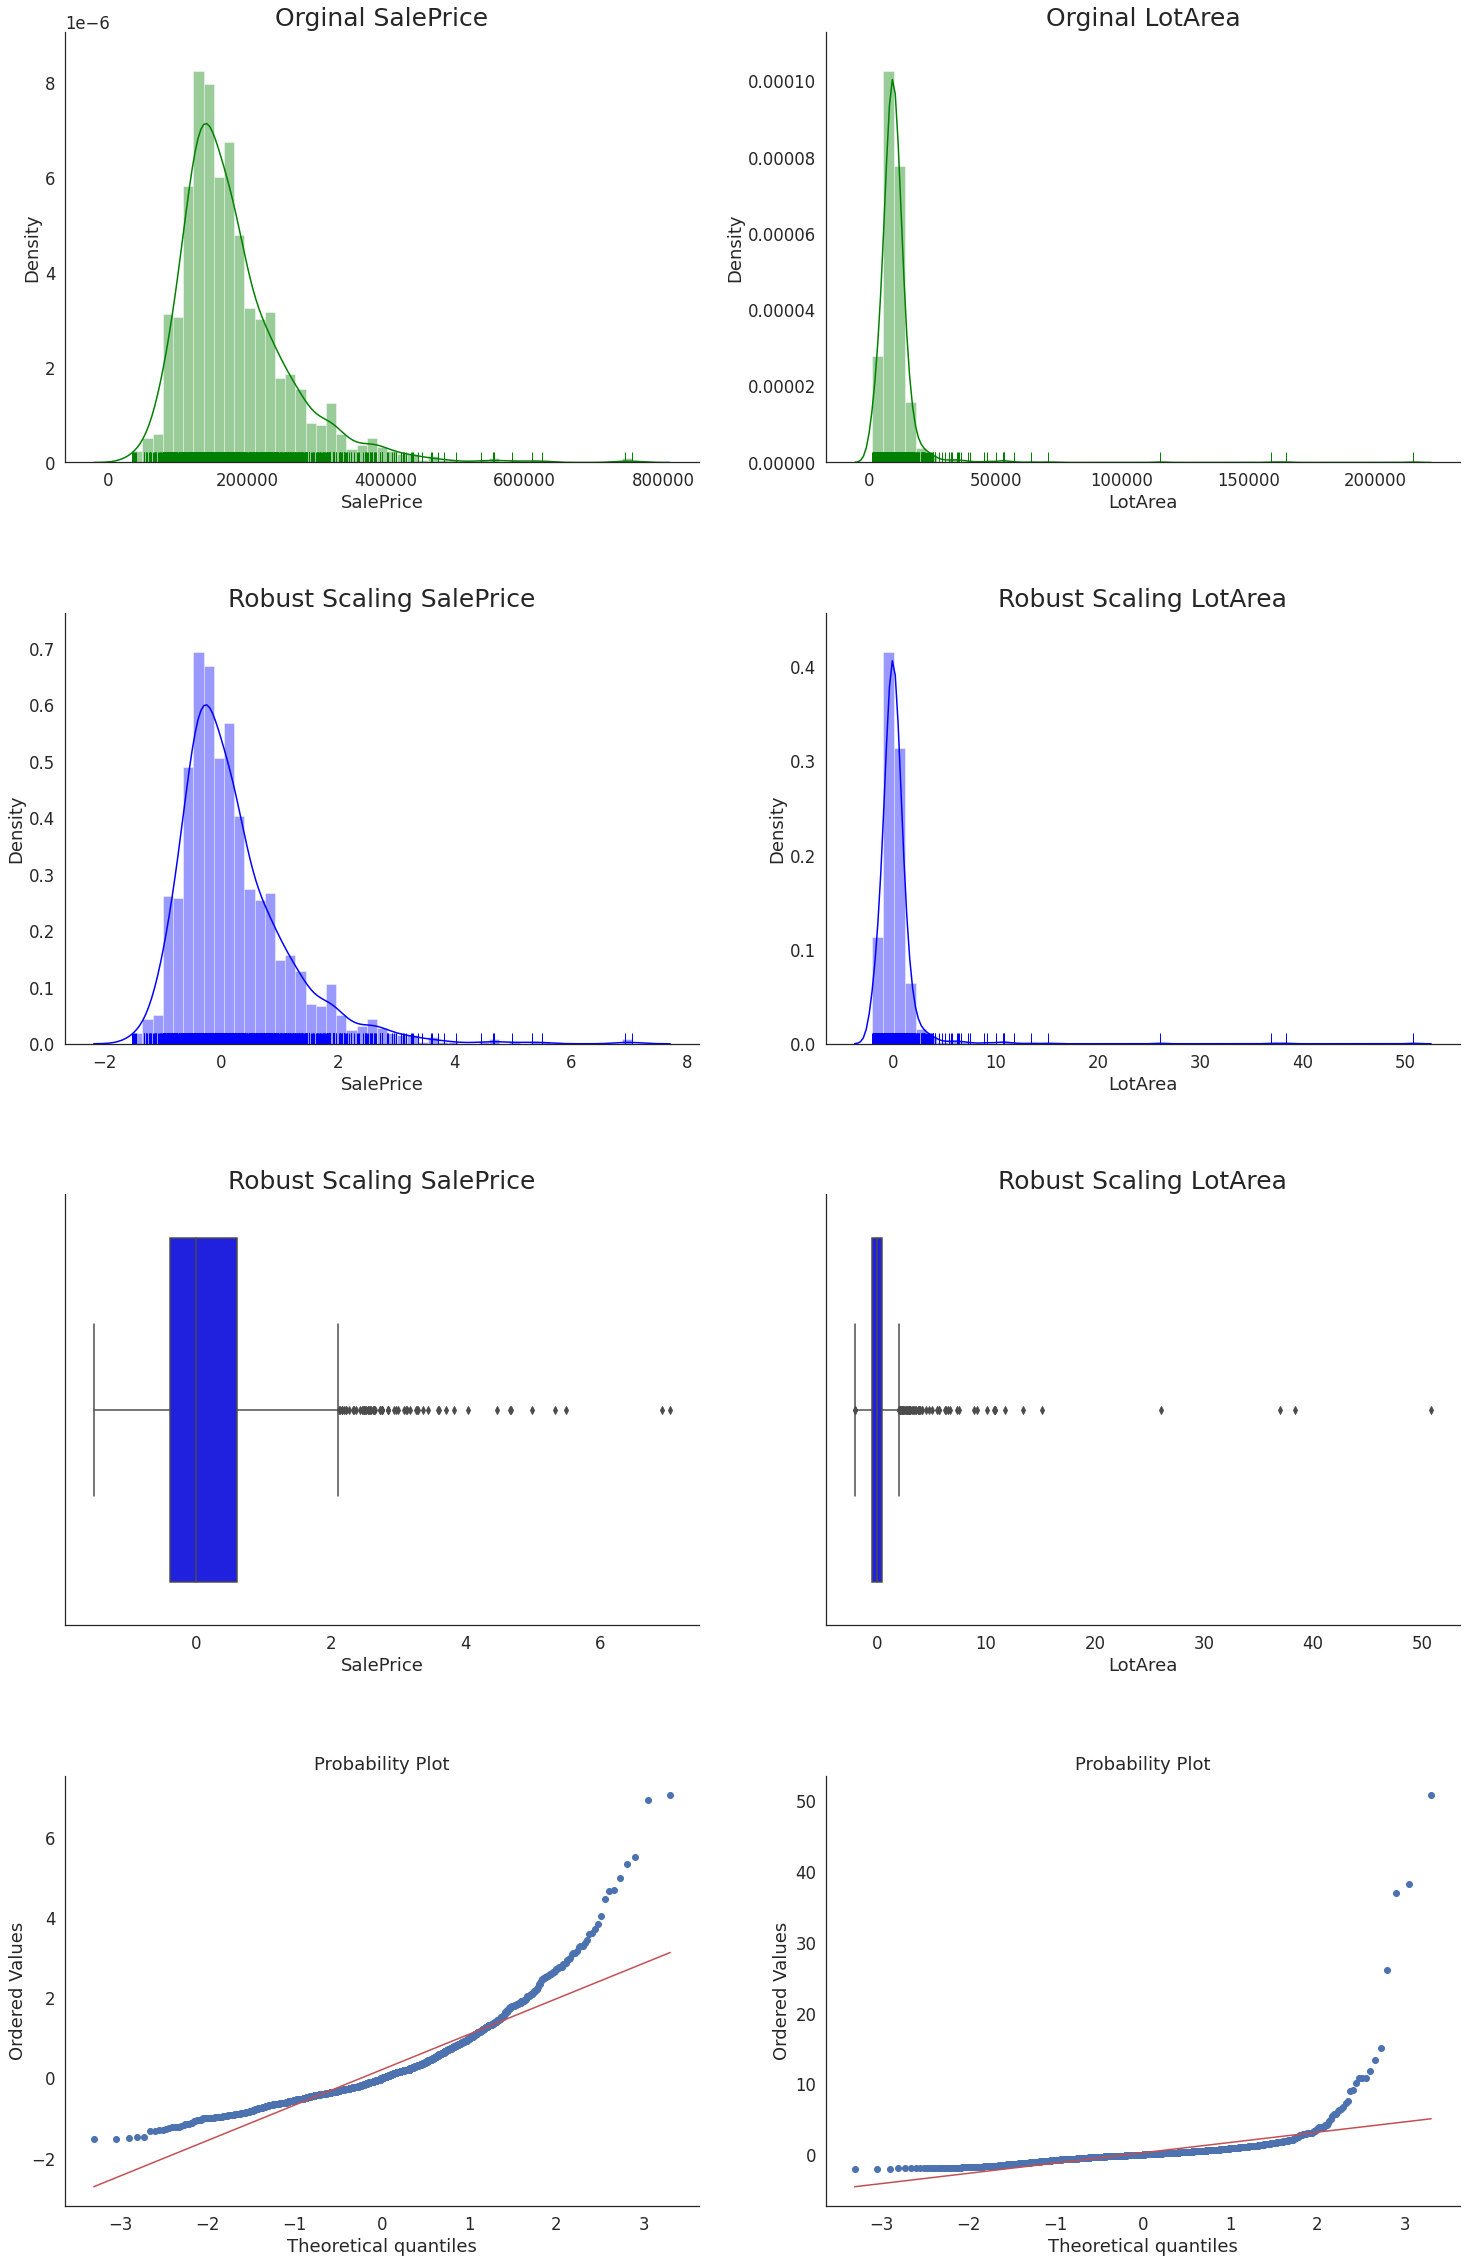

In [ ]:
from sklearn.preprocessing import RobustScaler
train_x = train_org.copy()

rcParams['figure.figsize'] = 25,40
fig, axes = plt.subplots(4, 2)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.35)

robuster = RobustScaler()
for i in range(2):
    train_x.loc[:,num_cols[i]] = robuster.fit_transform(train_x[[num_cols[i]]])
    sns.distplot(train_org.loc[:,num_cols[i]],ax=axes[0,i],rug=True,color='green')
    axes[0,i].set_title('Orginal '+num_cols[i],fontsize=25)
    sns.distplot(train_x.loc[:,num_cols[i]],ax=axes[1,i],rug=True,color='blue')
    axes[1,i].set_title('Robust Scaling '+num_cols[i],fontsize=25)
    sns.boxplot(train_x.loc[:,num_cols[i]],ax=axes[2,i],color='blue')
    axes[2,i].set_title('Robust Scaling '+num_cols[i],fontsize=25)
    stats.probplot(train_x[num_cols[i]],plot = axes[3,i])
    sns.despine()

In [ ]:
display_stat()

SalePrice:
mean: 0.2133, std: 0.9455, skew: 1.8829, kurtosis: 6.5363 
LotArea:
mean: 0.2565, std: 2.4657, skew: 12.2077, kurtosis: 203.2433 


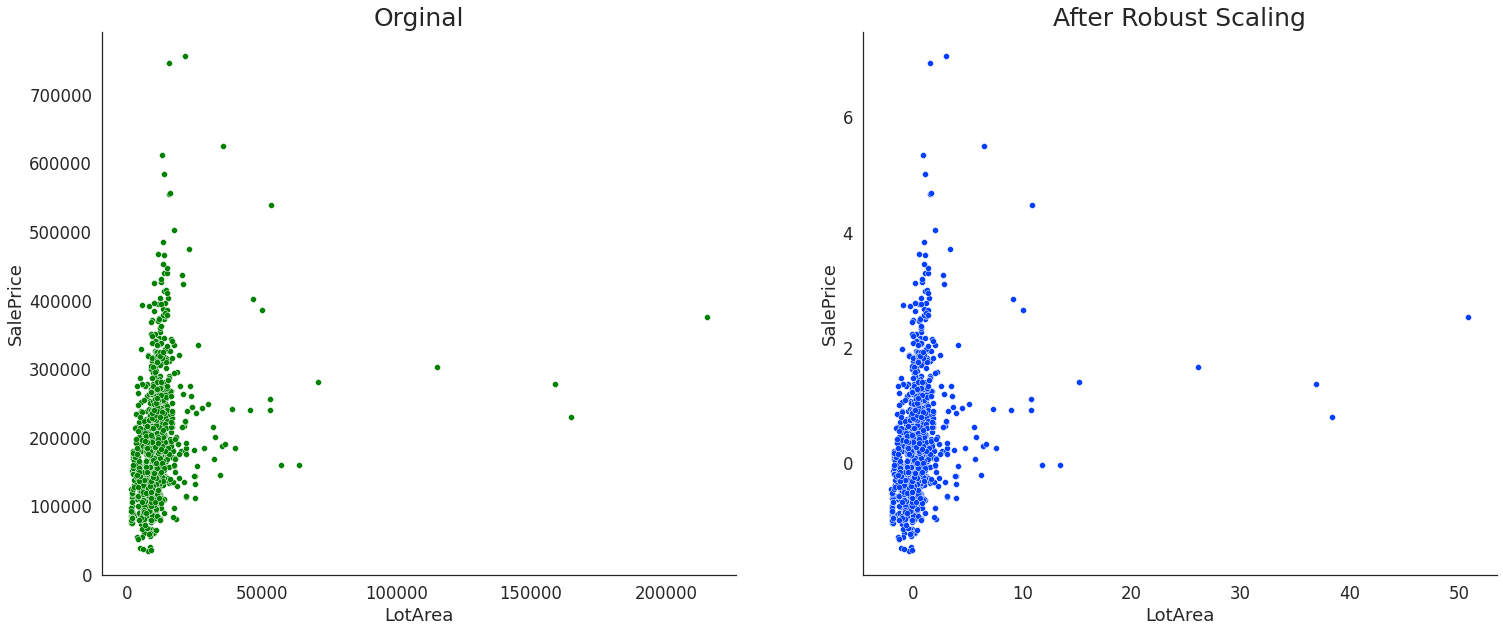

In [ ]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("bright")
rcParams['figure.figsize'] = 25,10
ax1 = plt.subplot(1,2,1)  
ax2 = plt.subplot(1,2,2)  
sns.scatterplot(data=train_org, y="SalePrice", x="LotArea",ax=ax1,color='green')
ax1.set_title('Orginal',fontsize=25)
sns.scatterplot(data =train_x, y="SalePrice", x="LotArea",ax=ax2)
ax2.set_title('After Robust Scaling',fontsize=25)
sns.despine()

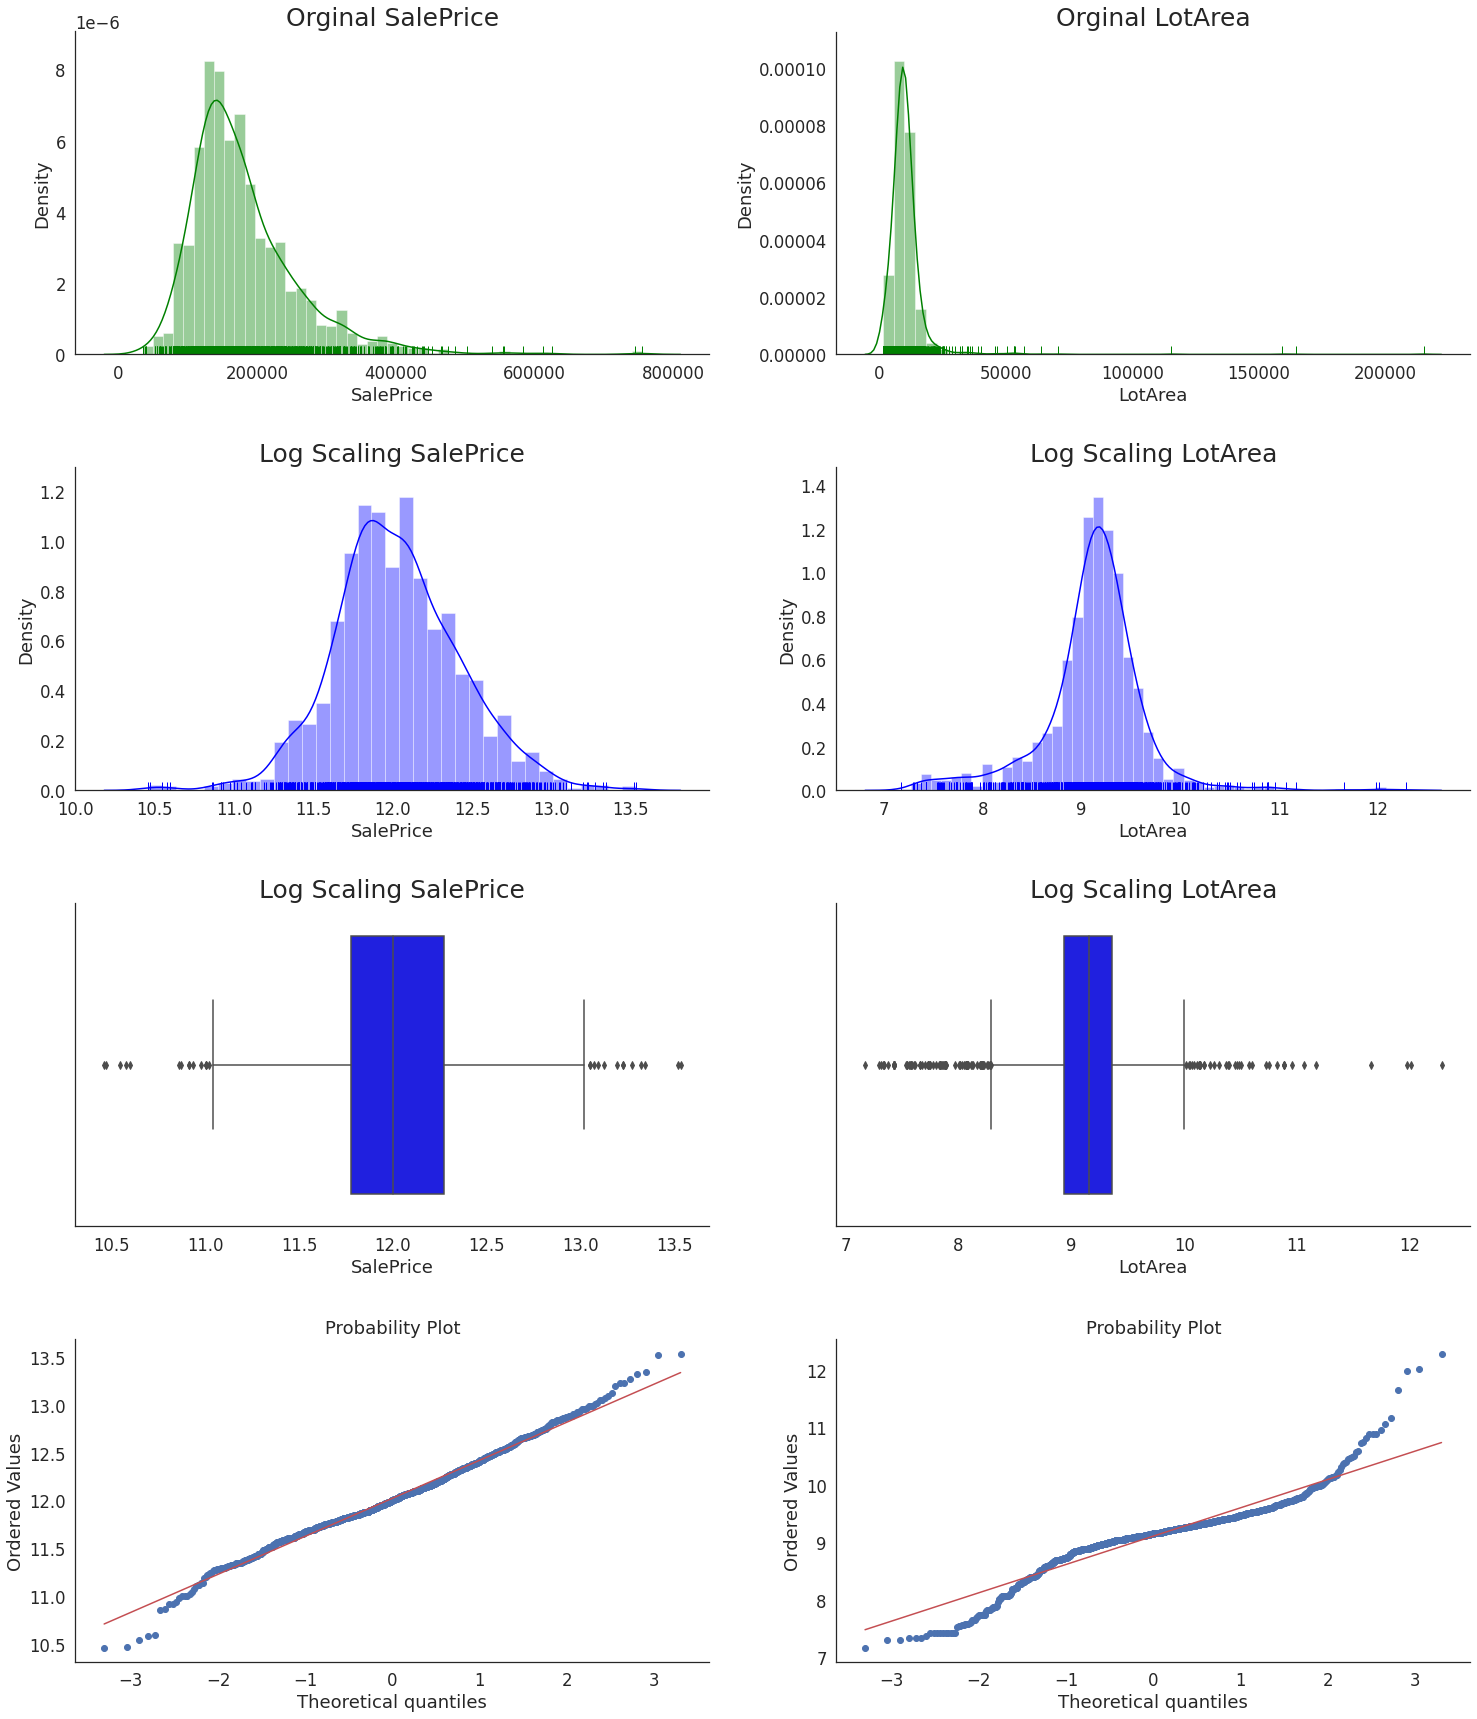

In [ ]:
train_x = train_org.copy()
rcParams['figure.figsize'] = 25,30
fig, axes = plt.subplots(4, 2)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.35)
for i in range(2):
    train_x.loc[:,num_cols[i]] = np.log1p(train_x[[num_cols[i]]])
    sns.distplot(train_org.loc[:,num_cols[i]],ax=axes[0,i],rug=True,color='green')
    axes[0,i].set_title('Orginal '+num_cols[i],fontsize=25)
    sns.distplot(train_x.loc[:,num_cols[i]],ax=axes[1,i],rug=True,color='blue')
    axes[1,i].set_title('Log Scaling '+num_cols[i],fontsize=25)
    sns.boxplot(train_x.loc[:,num_cols[i]],ax=axes[2,i],color='blue')
    axes[2,i].set_title('Log Scaling '+num_cols[i],fontsize=25)
    stats.probplot(train_x[num_cols[i]],plot = axes[3,i])
    sns.despine()

In [ ]:
display_stat()

SalePrice:
mean: 12.0241, std: 0.3994, skew: 0.1213, kurtosis: 0.8095 
LotArea:
mean: 9.1110, std: 0.5174, skew: -0.1374, kurtosis: 4.7138 


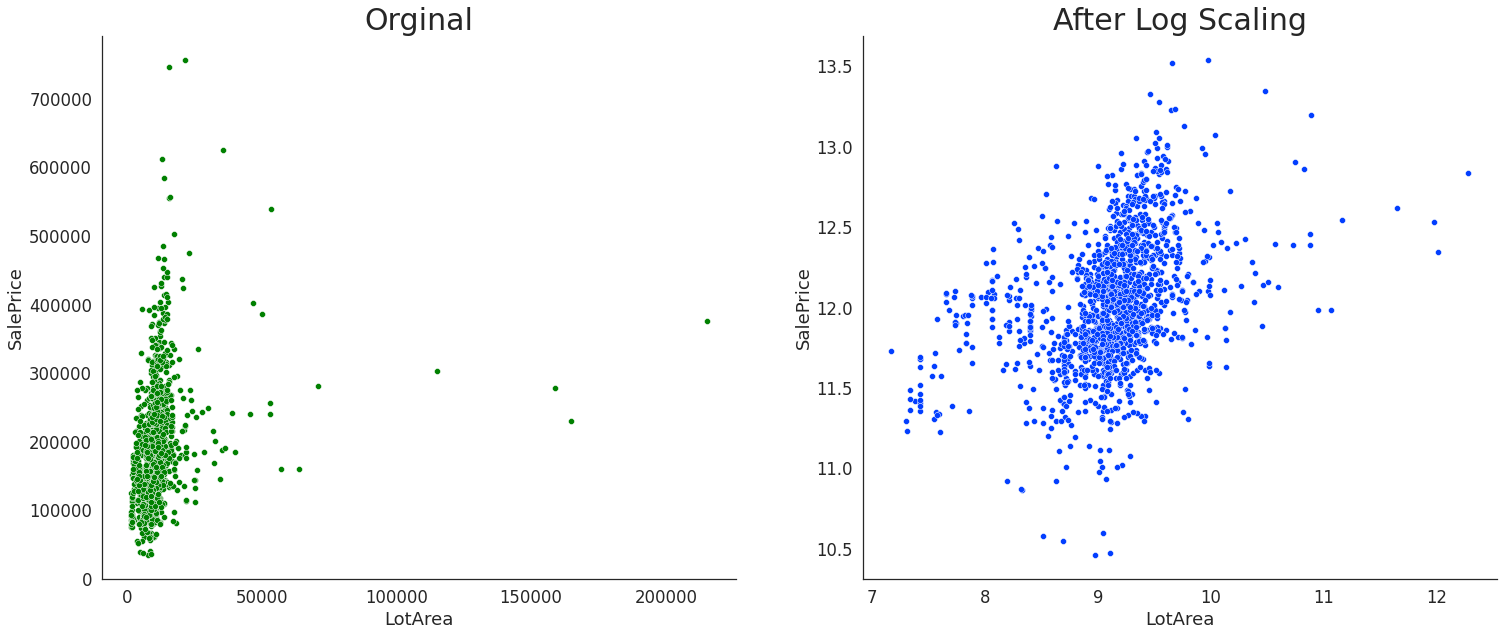

In [ ]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("bright")
rcParams['figure.figsize'] = 25,10
ax1 = plt.subplot(1,2,1)  
ax2 = plt.subplot(1,2,2)  
sns.scatterplot(data=train_org, y="SalePrice", x="LotArea",ax=ax1,color='green')
ax1.set_title('Orginal',fontsize=30)
sns.scatterplot(data =train_x, y="SalePrice", x="LotArea",ax=ax2)
ax2.set_title('After Log Scaling',fontsize=30)
sns.despine()

<Figure size 1800x2880 with 0 Axes>

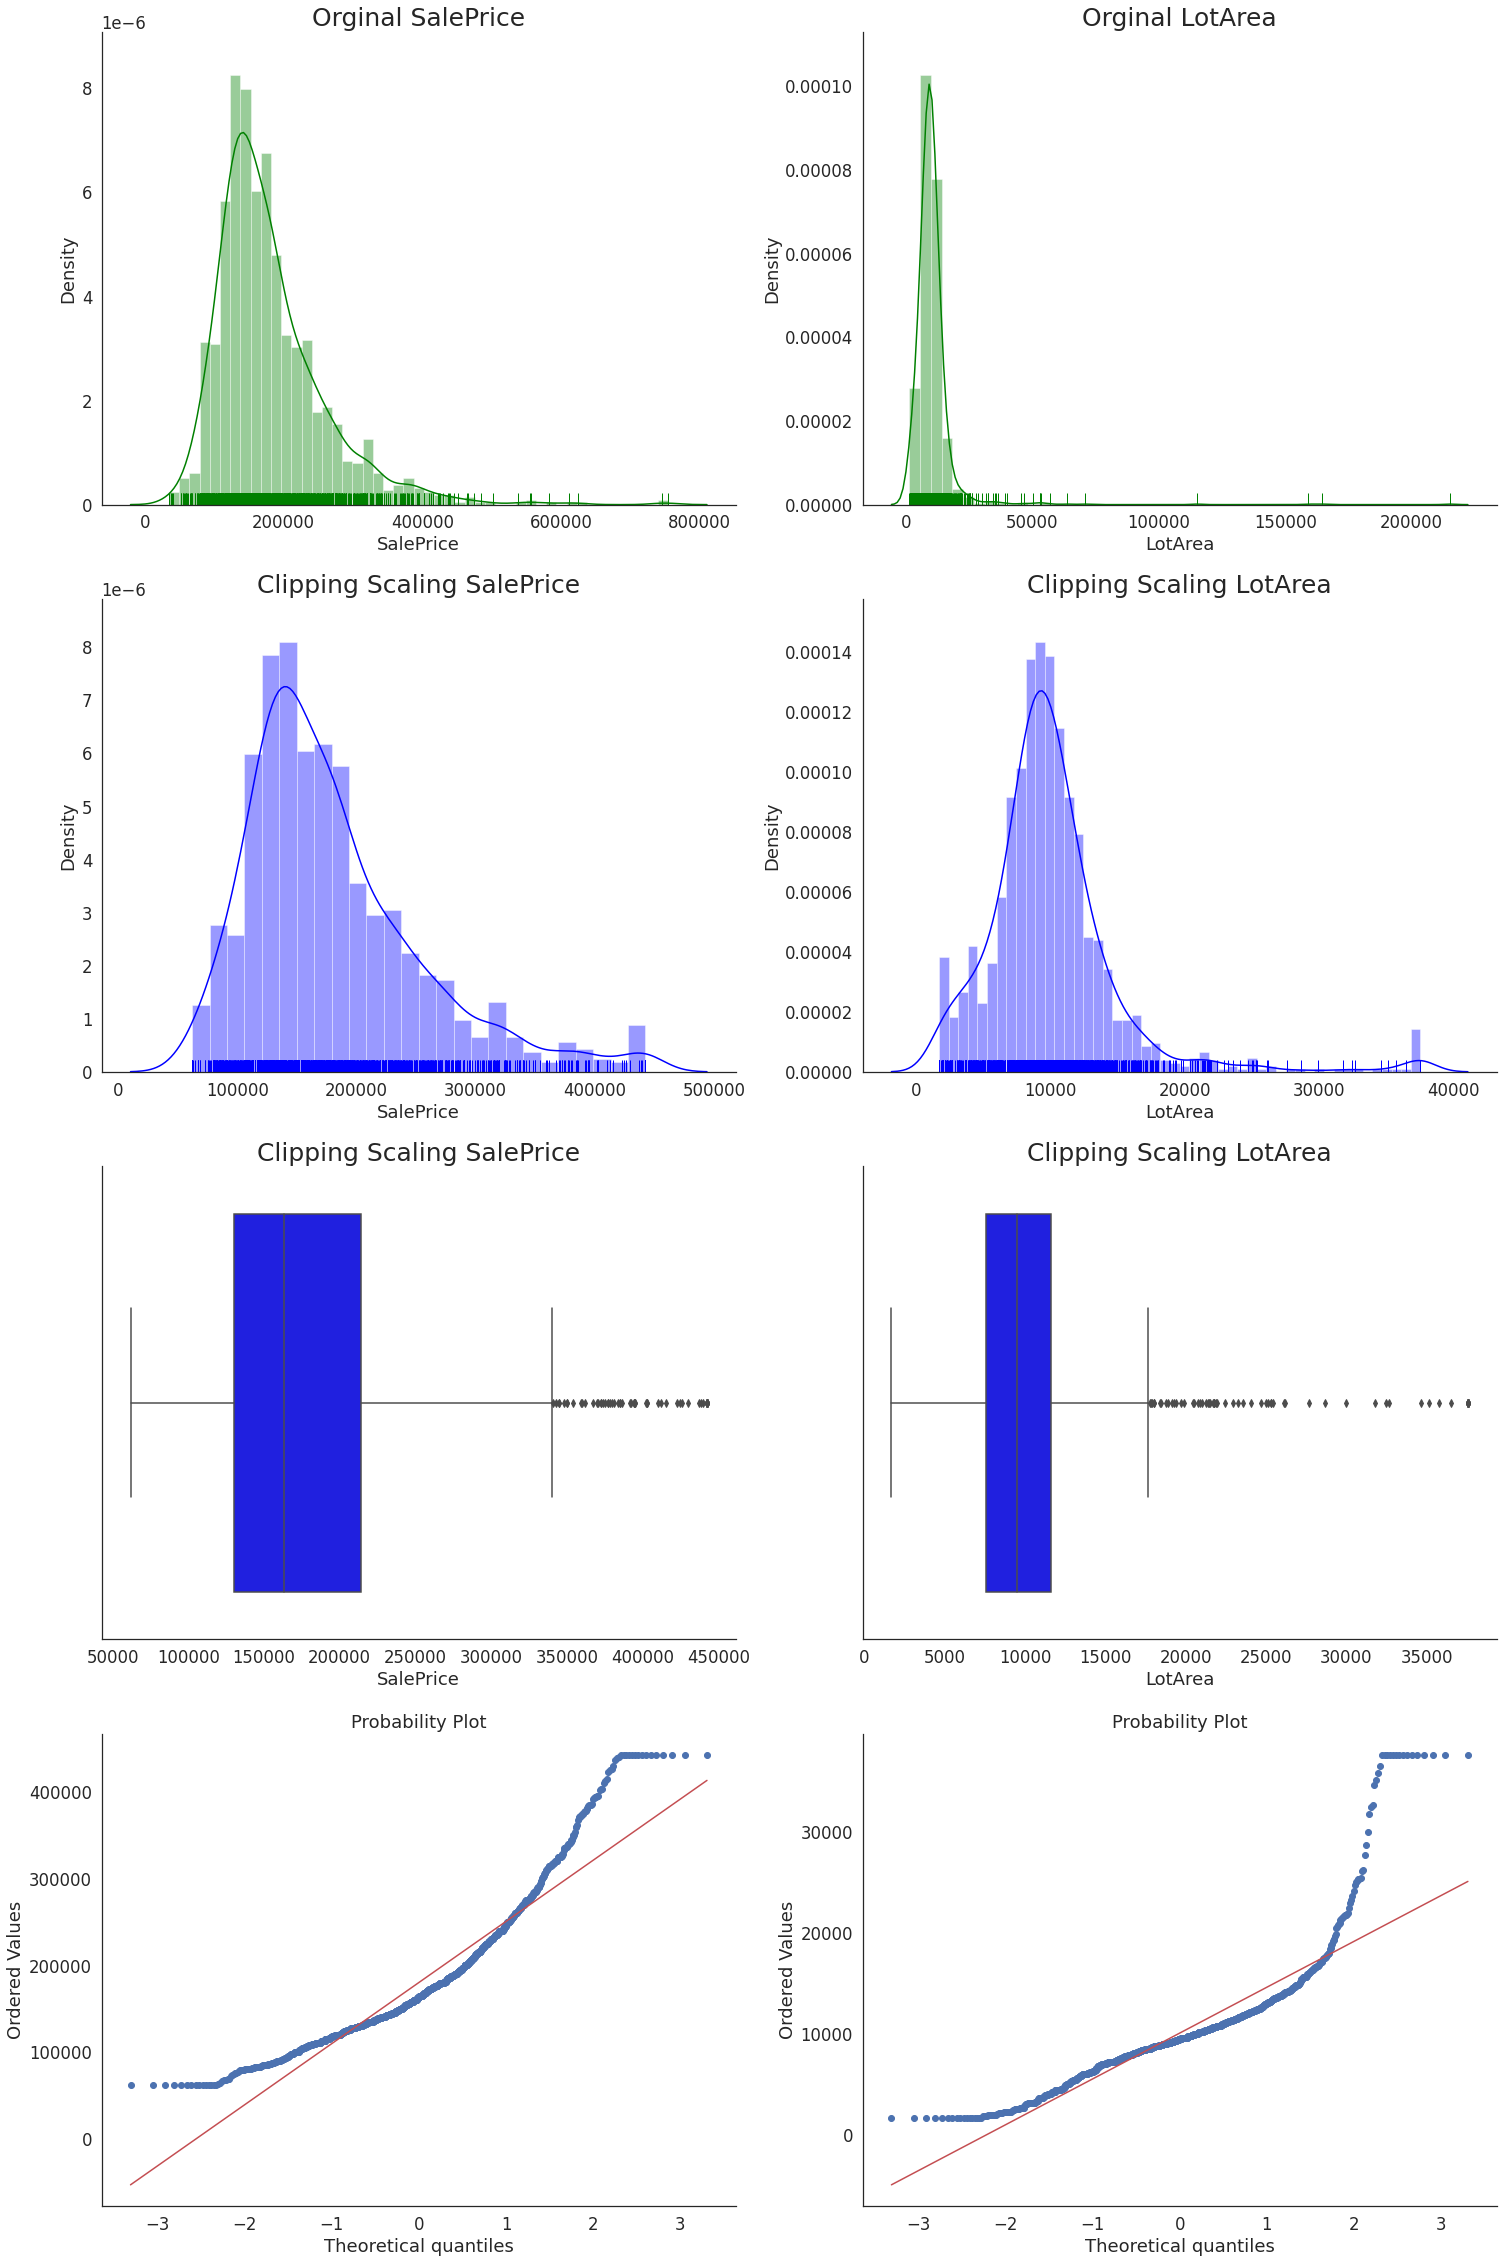

In [ ]:
train_x = train_org.copy()
p01 = train_x[num_cols].quantile(0.01)
p99 = train_x[num_cols].quantile(0.99)

rcParams['figure.figsize'] = 25,40
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=1.5)
# Values below 1% point are clipped to 1% point, and values above 99% point are clipped to 99% point
fig, axes = plt.subplots(4, 2)
for i in range(2):
    train_x.loc[:,num_cols[i]]  = train_x[[num_cols[i]]].clip(p01, p99, axis=1)
    sns.distplot(train_org.loc[:,num_cols[i]],ax=axes[0,i],rug=True,color='green')
    axes[0,i].set_title('Orginal '+num_cols[i],fontsize=25)
    sns.distplot(train_x.loc[:,num_cols[i]],ax=axes[1,i],rug=True,color='blue')
    axes[1,i].set_title('Clipping Scaling '+num_cols[i],fontsize=25)
    sns.boxplot(train_x.loc[:,num_cols[i]],ax=axes[2,i],color='blue')
    axes[2,i].set_title('Clipping Scaling '+num_cols[i],fontsize=25)
    stats.probplot(train_x[num_cols[i]],plot = axes[3,i])
    sns.despine()

In [ ]:
display_stat()

SalePrice:
mean: 179926.4162, std: 74052.6589, skew: 1.2727, kurtosis: 1.7734 
LotArea:
mean: 10063.0066, std: 5062.2991, skew: 2.4517, kurtosis: 10.4269 


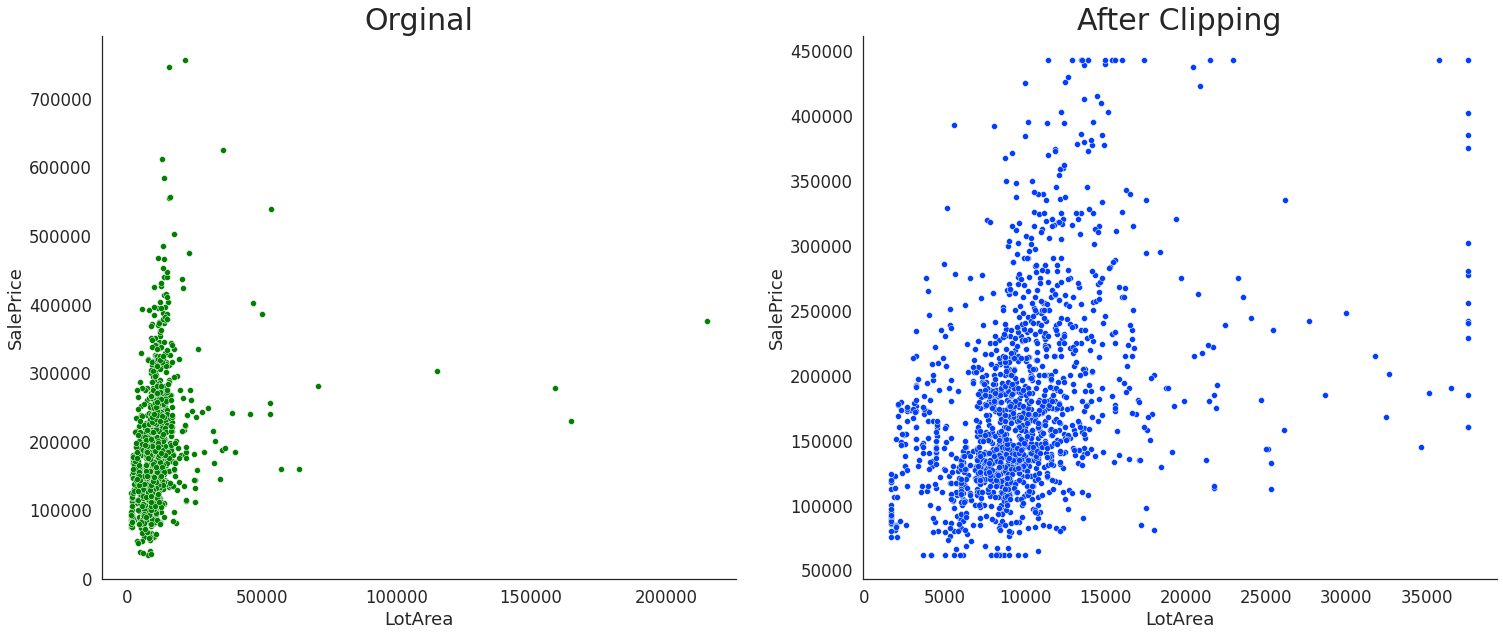

In [ ]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("bright")
rcParams['figure.figsize'] = 25,10
ax1 = plt.subplot(1,2,1)  
ax2 = plt.subplot(1,2,2)  
sns.scatterplot(data=train_org, y="SalePrice", x="LotArea",ax=ax1,color='green')
ax1.set_title('Orginal',fontsize=30)
sns.scatterplot(data =train_x, y="SalePrice", x="LotArea",ax=ax2)
ax2.set_title('After Clipping',fontsize=30)
sns.despine()

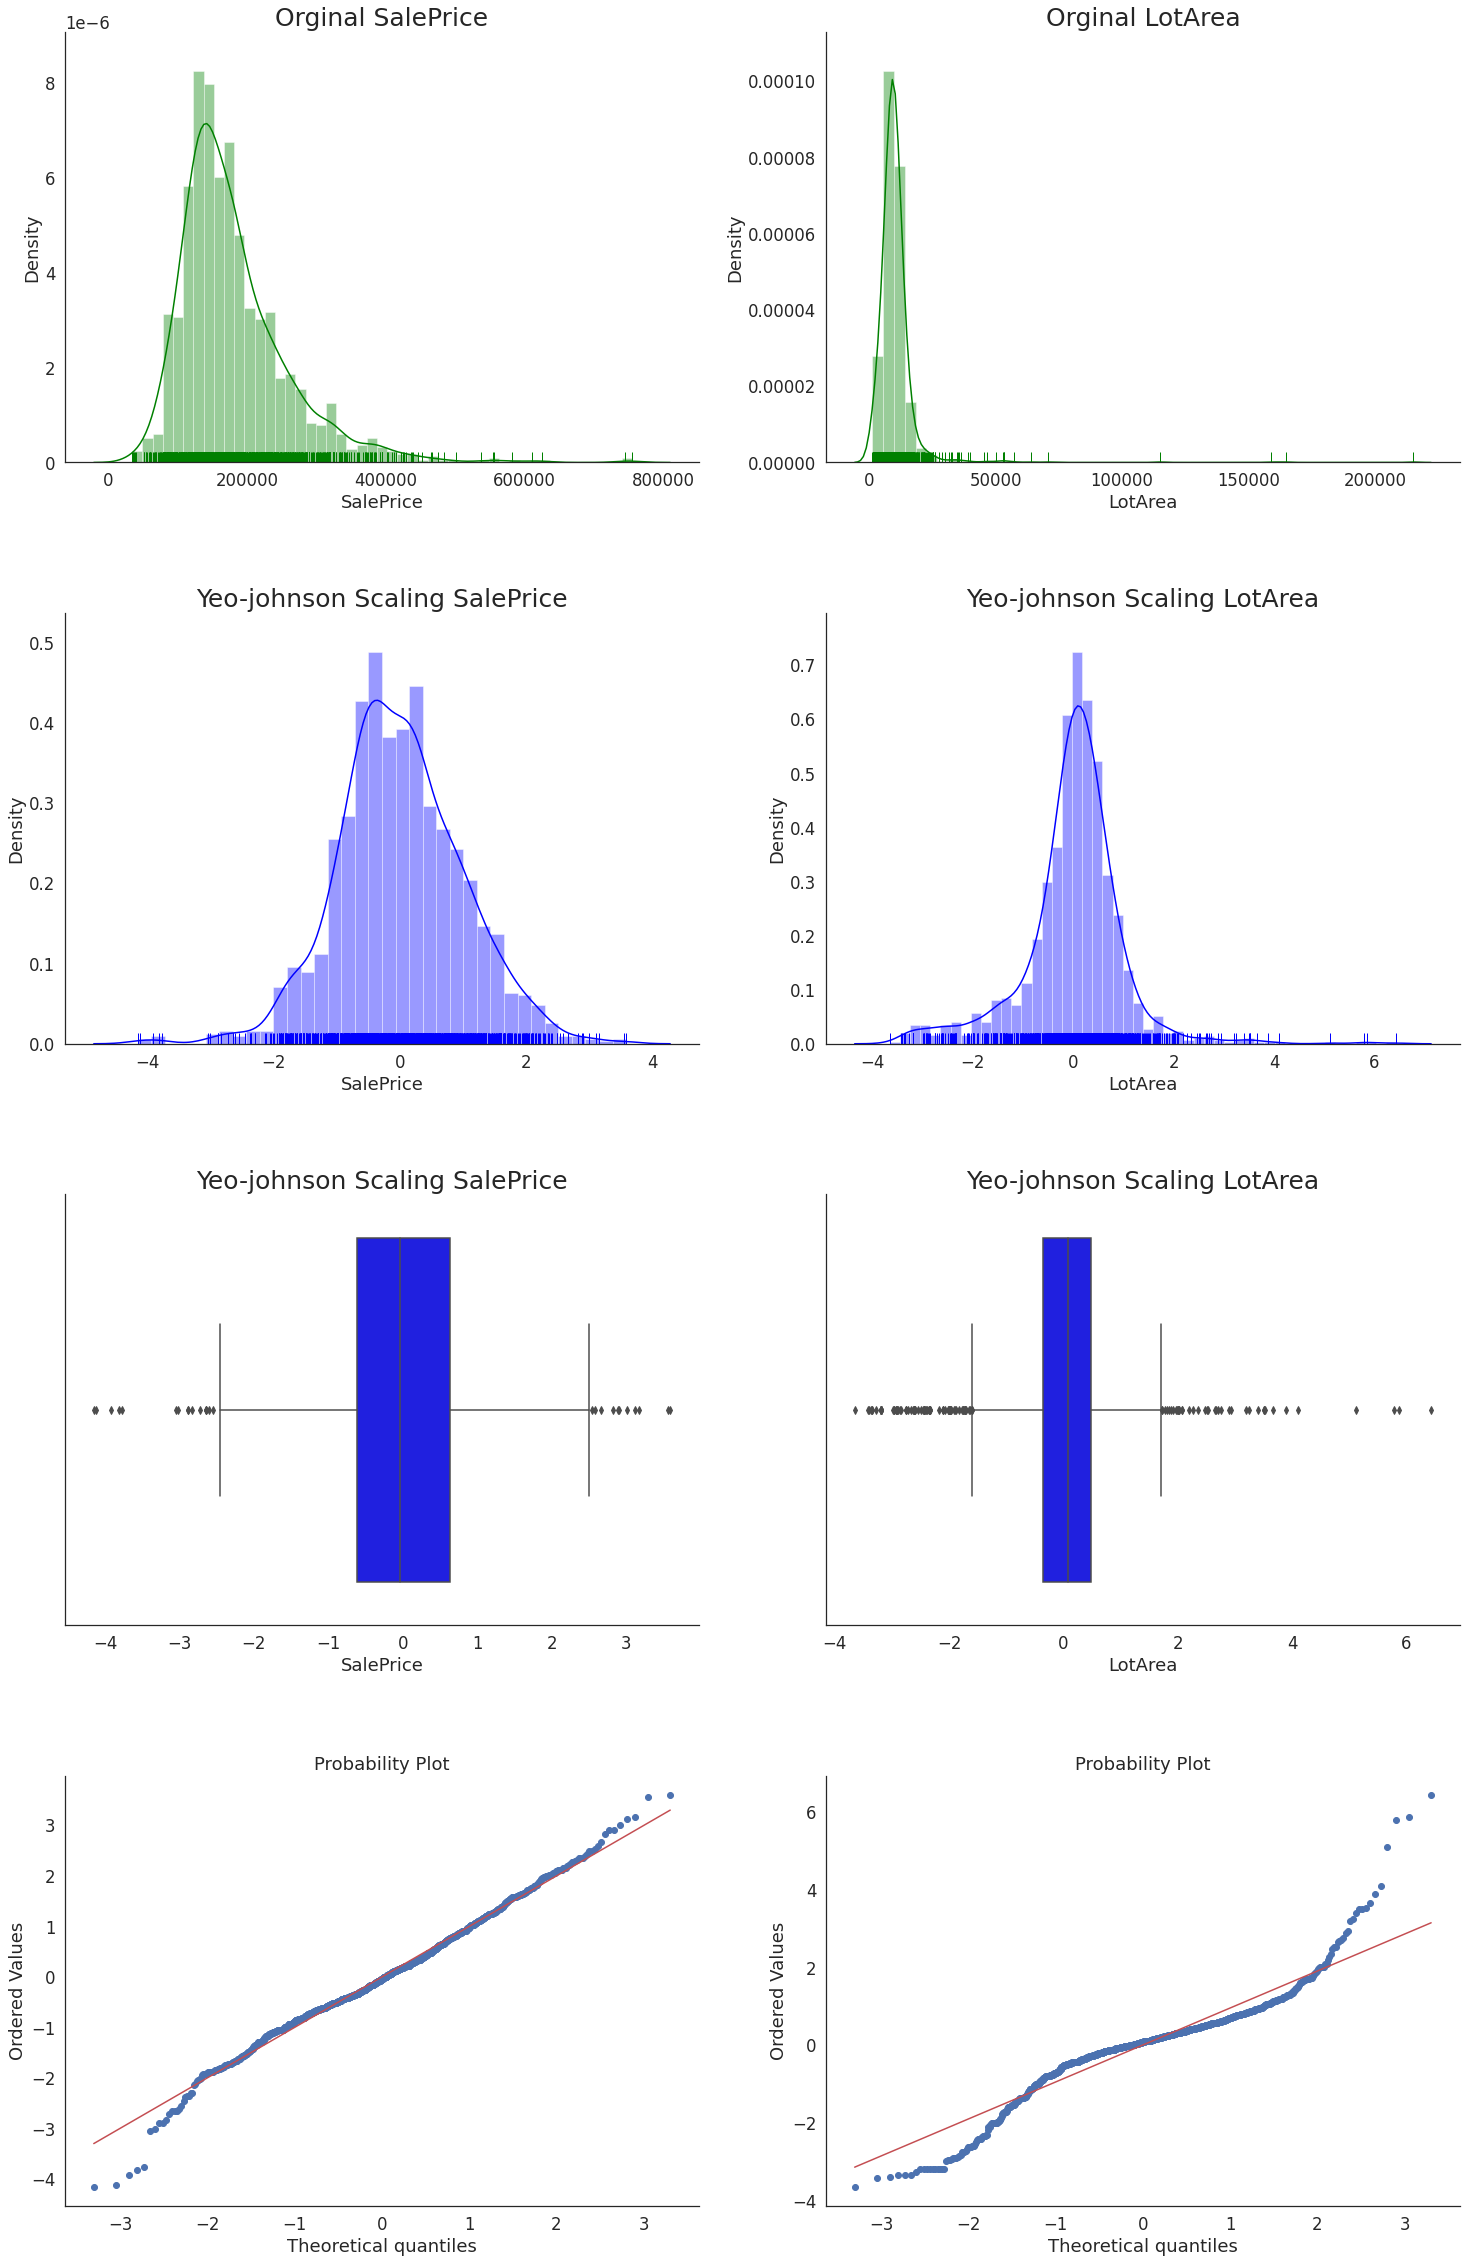

In [ ]:
from sklearn.preprocessing import PowerTransformer
train_x = train_org.copy()
rcParams['figure.figsize'] = 25,40
fig, axes = plt.subplots(4, 2)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.35)

pt = PowerTransformer(method='yeo-johnson')
for i in range(2):
    train_x.loc[:,num_cols[i]] = pt.fit_transform(train_x[[num_cols[i]]])
    sns.distplot(train_org.loc[:,num_cols[i]],ax=axes[0,i],rug=True,color='green')
    axes[0,i].set_title('Orginal '+num_cols[i],fontsize=25)
    sns.distplot(train_x.loc[:,num_cols[i]],ax=axes[1,i],rug=True,color='blue')
    axes[1,i].set_title('Yeo-johnson Scaling '+num_cols[i],fontsize=25)
    sns.boxplot(train_x.loc[:,num_cols[i]],ax=axes[2,i],color='blue')
    axes[2,i].set_title('Yeo-johnson Scaling '+num_cols[i],fontsize=25)
    stats.probplot(train_x[num_cols[i]],plot = axes[3,i])
    sns.despine()

In [ ]:
display_stat()

SalePrice:
mean: 0.0000, std: 1.0003, skew: -0.0087, kurtosis: 0.8779 
LotArea:
mean: 0.0000, std: 1.0003, skew: 0.0266, kurtosis: 5.1364 


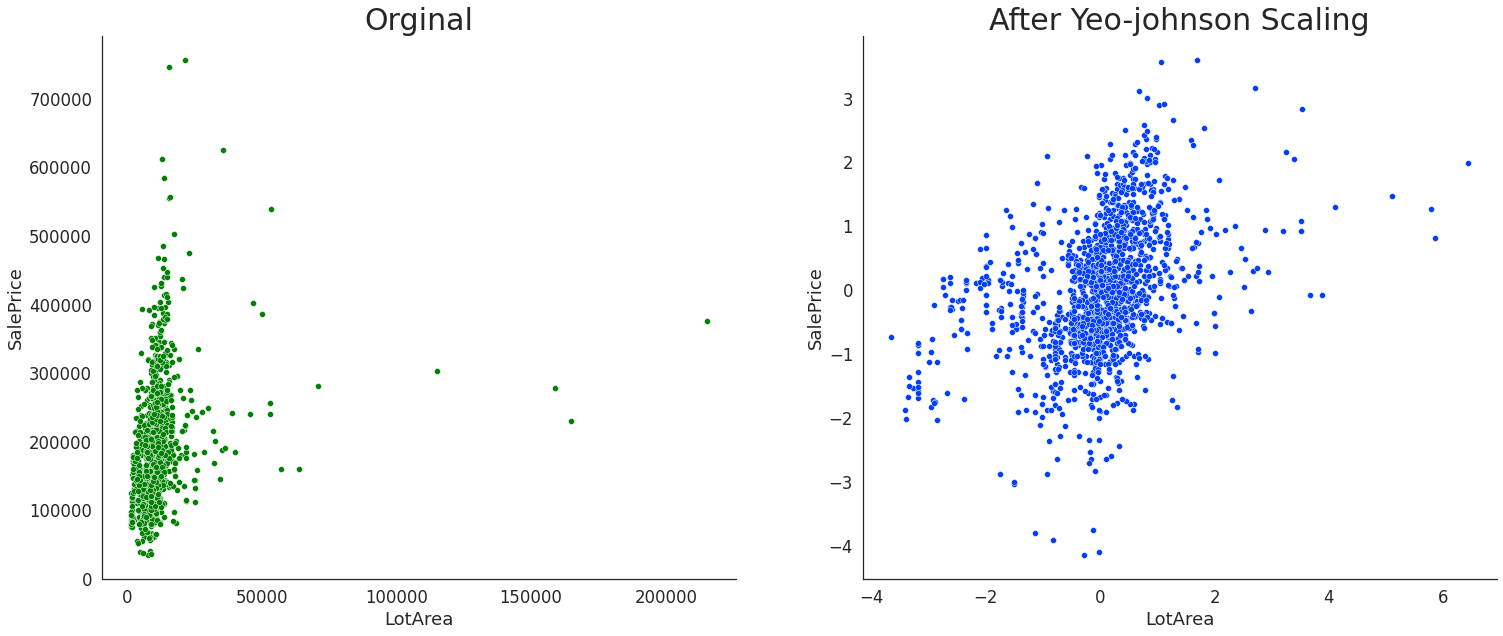

In [ ]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("bright")
rcParams['figure.figsize'] = 25,10
ax1 = plt.subplot(1,2,1)  
ax2 = plt.subplot(1,2,2)  
sns.scatterplot(data=train_org, y="SalePrice", x="LotArea",ax=ax1,color='green')
ax1.set_title('Orginal',fontsize=30)
sns.scatterplot(data =train_x, y="SalePrice", x="LotArea",ax=ax2)
ax2.set_title('After Yeo-johnson Scaling',fontsize=30)
sns.despine()

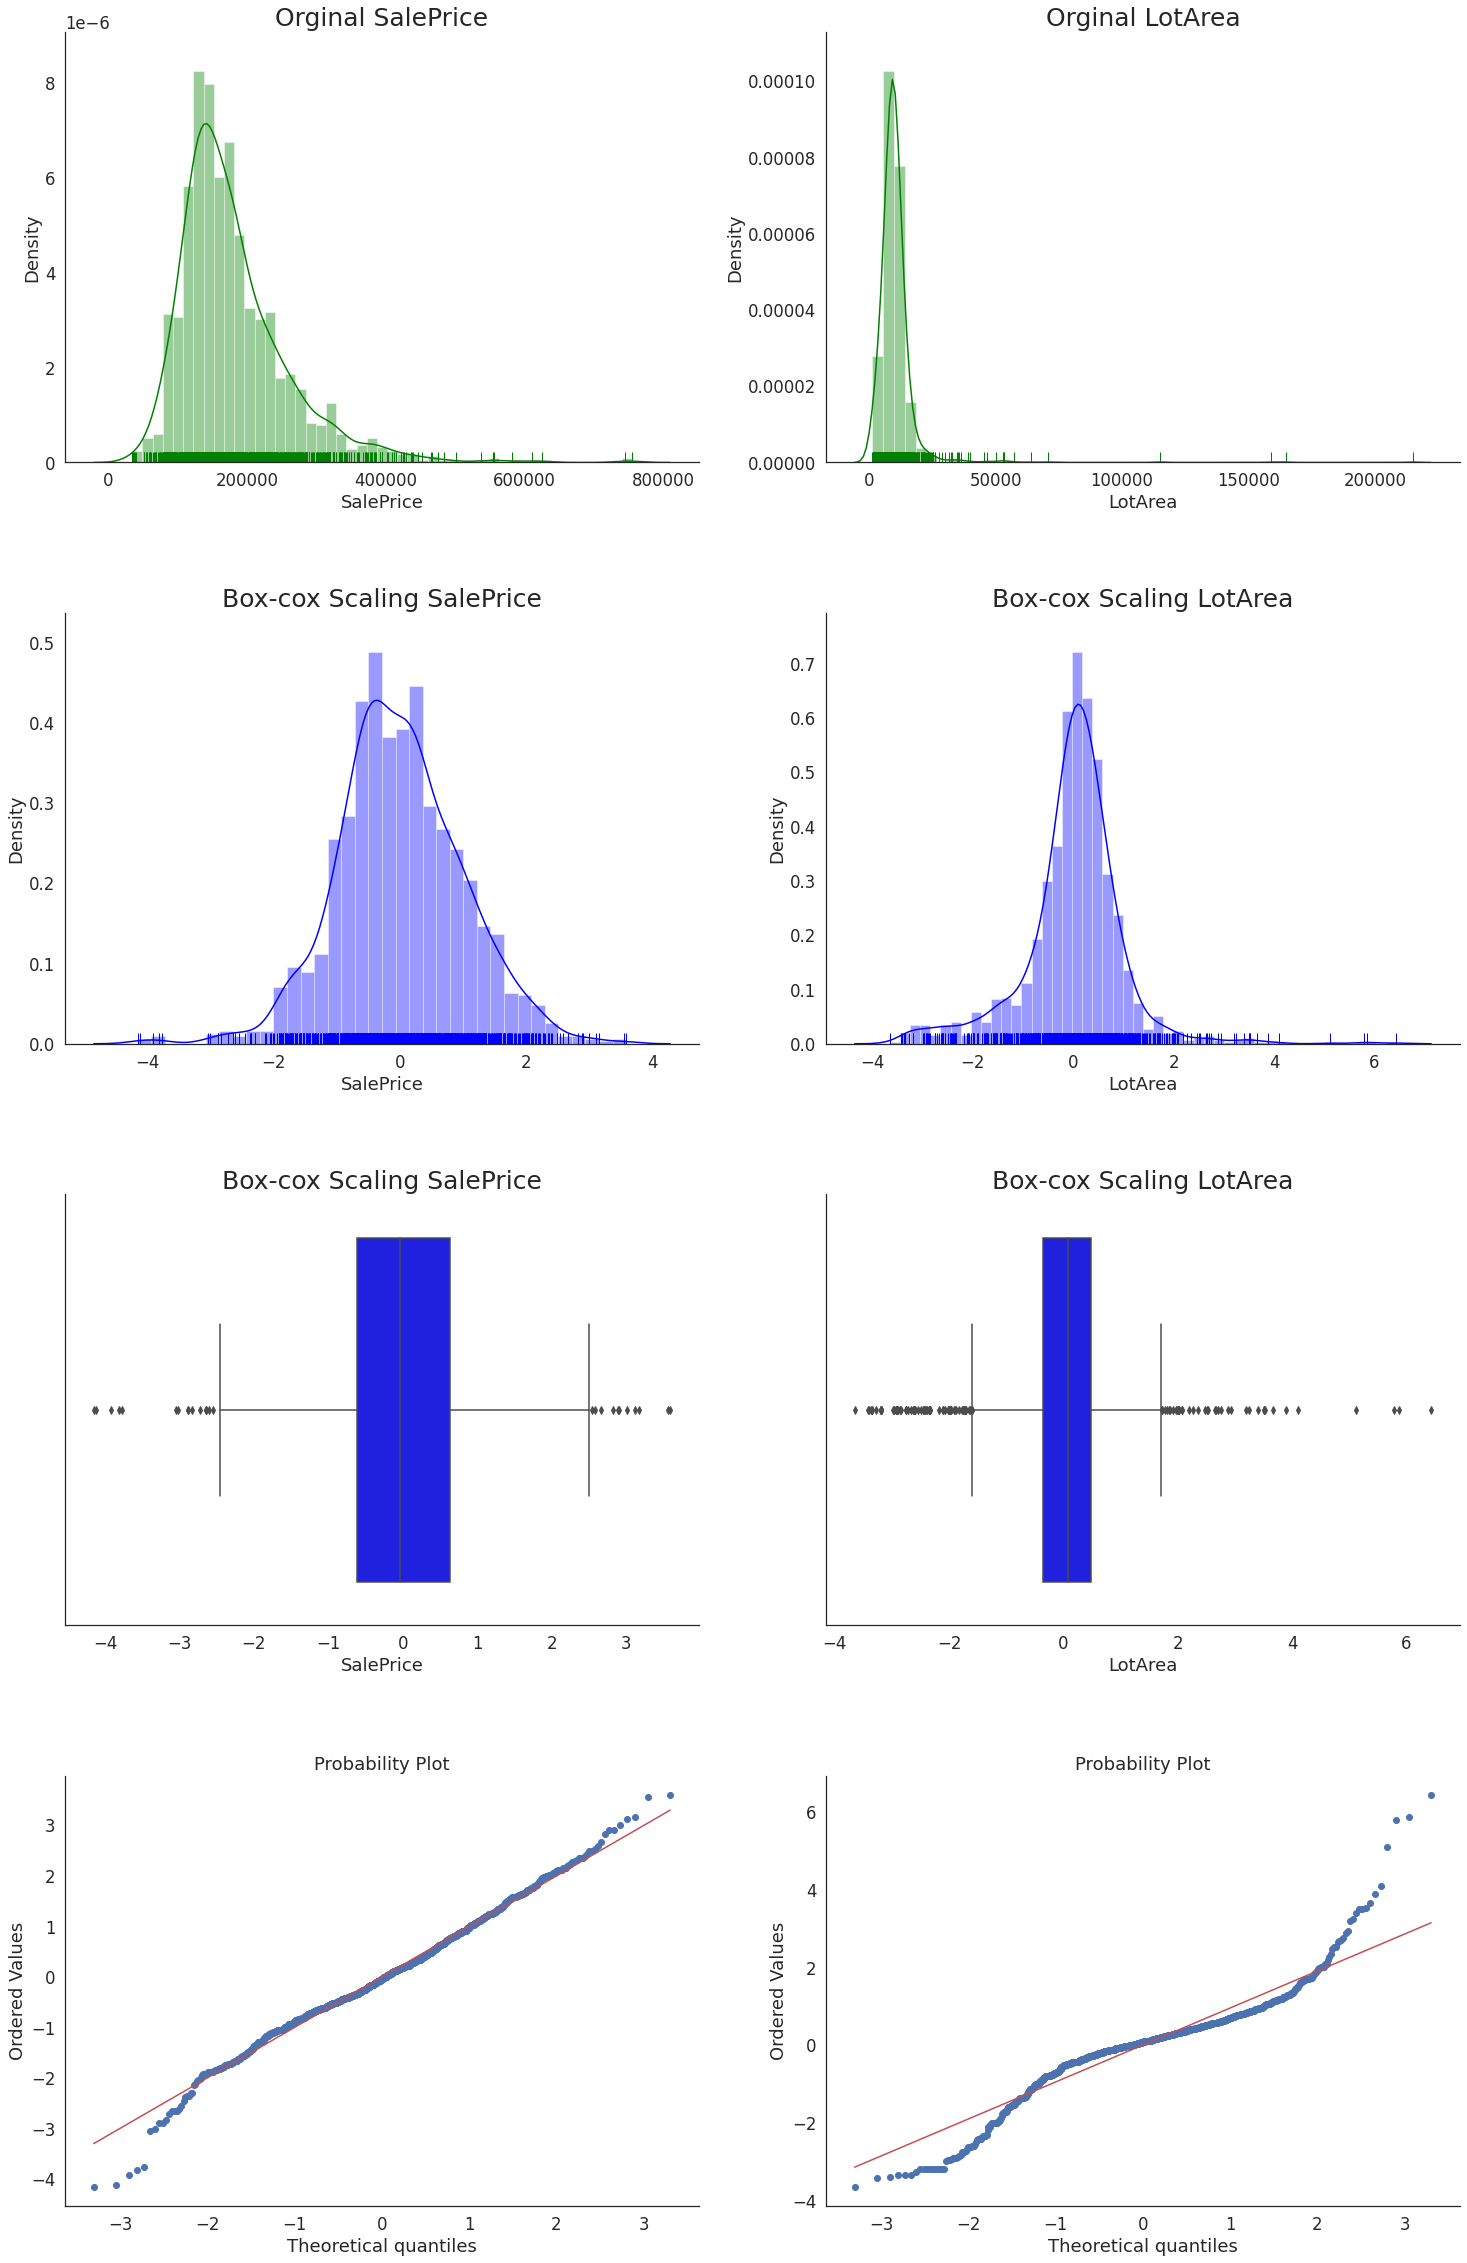

In [ ]:
from sklearn.preprocessing import PowerTransformer
train_x = train_org.copy()
rcParams['figure.figsize'] = 25,40
fig, axes = plt.subplots(4, 2)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.35)

pt = PowerTransformer(method= "box-cox")
for i in range(2):
    train_x.loc[:,num_cols[i]] = pt.fit_transform(train_x[[num_cols[i]]])
    sns.distplot(train_org.loc[:,num_cols[i]],ax=axes[0,i],rug=True,color='green')
    axes[0,i].set_title('Orginal '+num_cols[i],fontsize=25)
    sns.distplot(train_x.loc[:,num_cols[i]],ax=axes[1,i],rug=True,color='blue')
    axes[1,i].set_title('Box-cox Scaling '+num_cols[i],fontsize=25)
    sns.boxplot(train_x.loc[:,num_cols[i]],ax=axes[2,i],color='blue')
    axes[2,i].set_title('Box-cox Scaling '+num_cols[i],fontsize=25)
    stats.probplot(train_x[num_cols[i]],plot = axes[3,i])
    sns.despine()

In [ ]:
display_stat()

SalePrice:
mean: 0.0000, std: 1.0003, skew: -0.0087, kurtosis: 0.8779 
LotArea:
mean: 0.0000, std: 1.0003, skew: 0.0267, kurtosis: 5.1376 


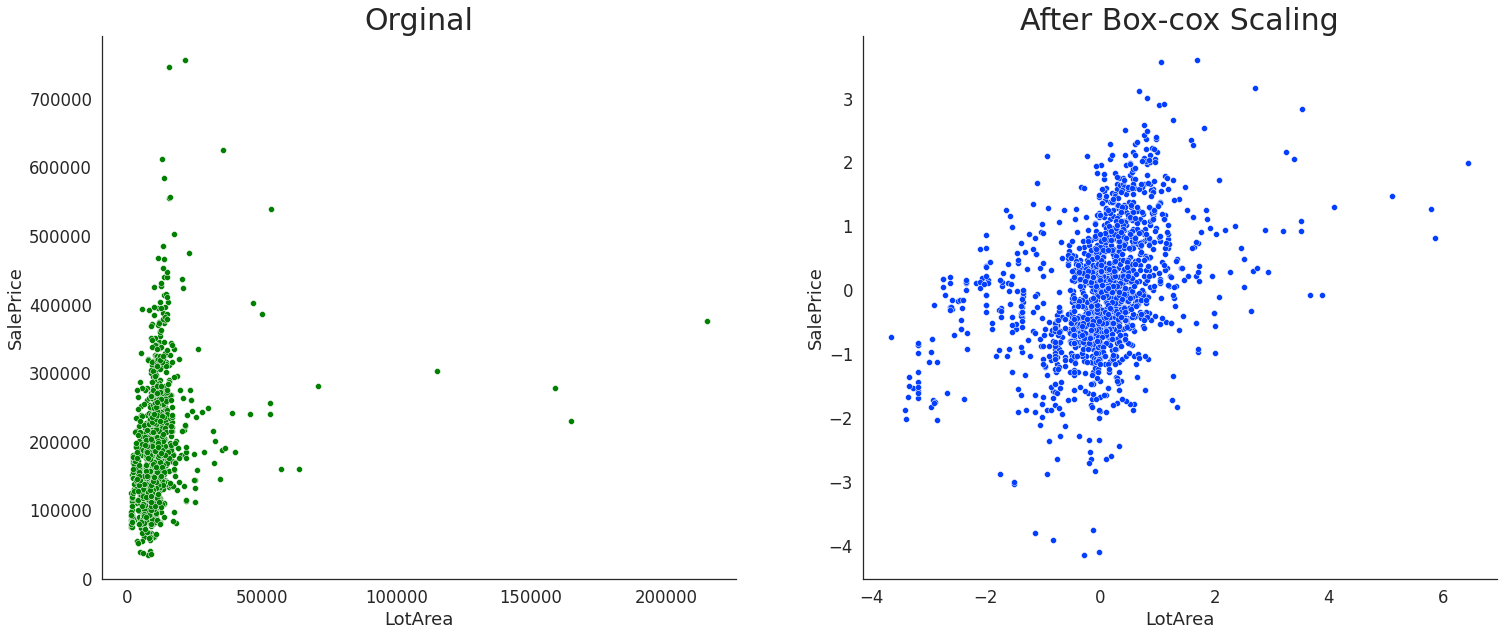

In [ ]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("bright")
rcParams['figure.figsize'] = 25,10
ax1 = plt.subplot(1,2,1)  
ax2 = plt.subplot(1,2,2)  
sns.scatterplot(data=train_org, y="SalePrice", x="LotArea",ax=ax1,color='green')
ax1.set_title('Orginal',fontsize=30)
sns.scatterplot(data =train_x, y="SalePrice", x="LotArea",ax=ax2)
ax2.set_title('After Box-cox Scaling',fontsize=30)
sns.despine()

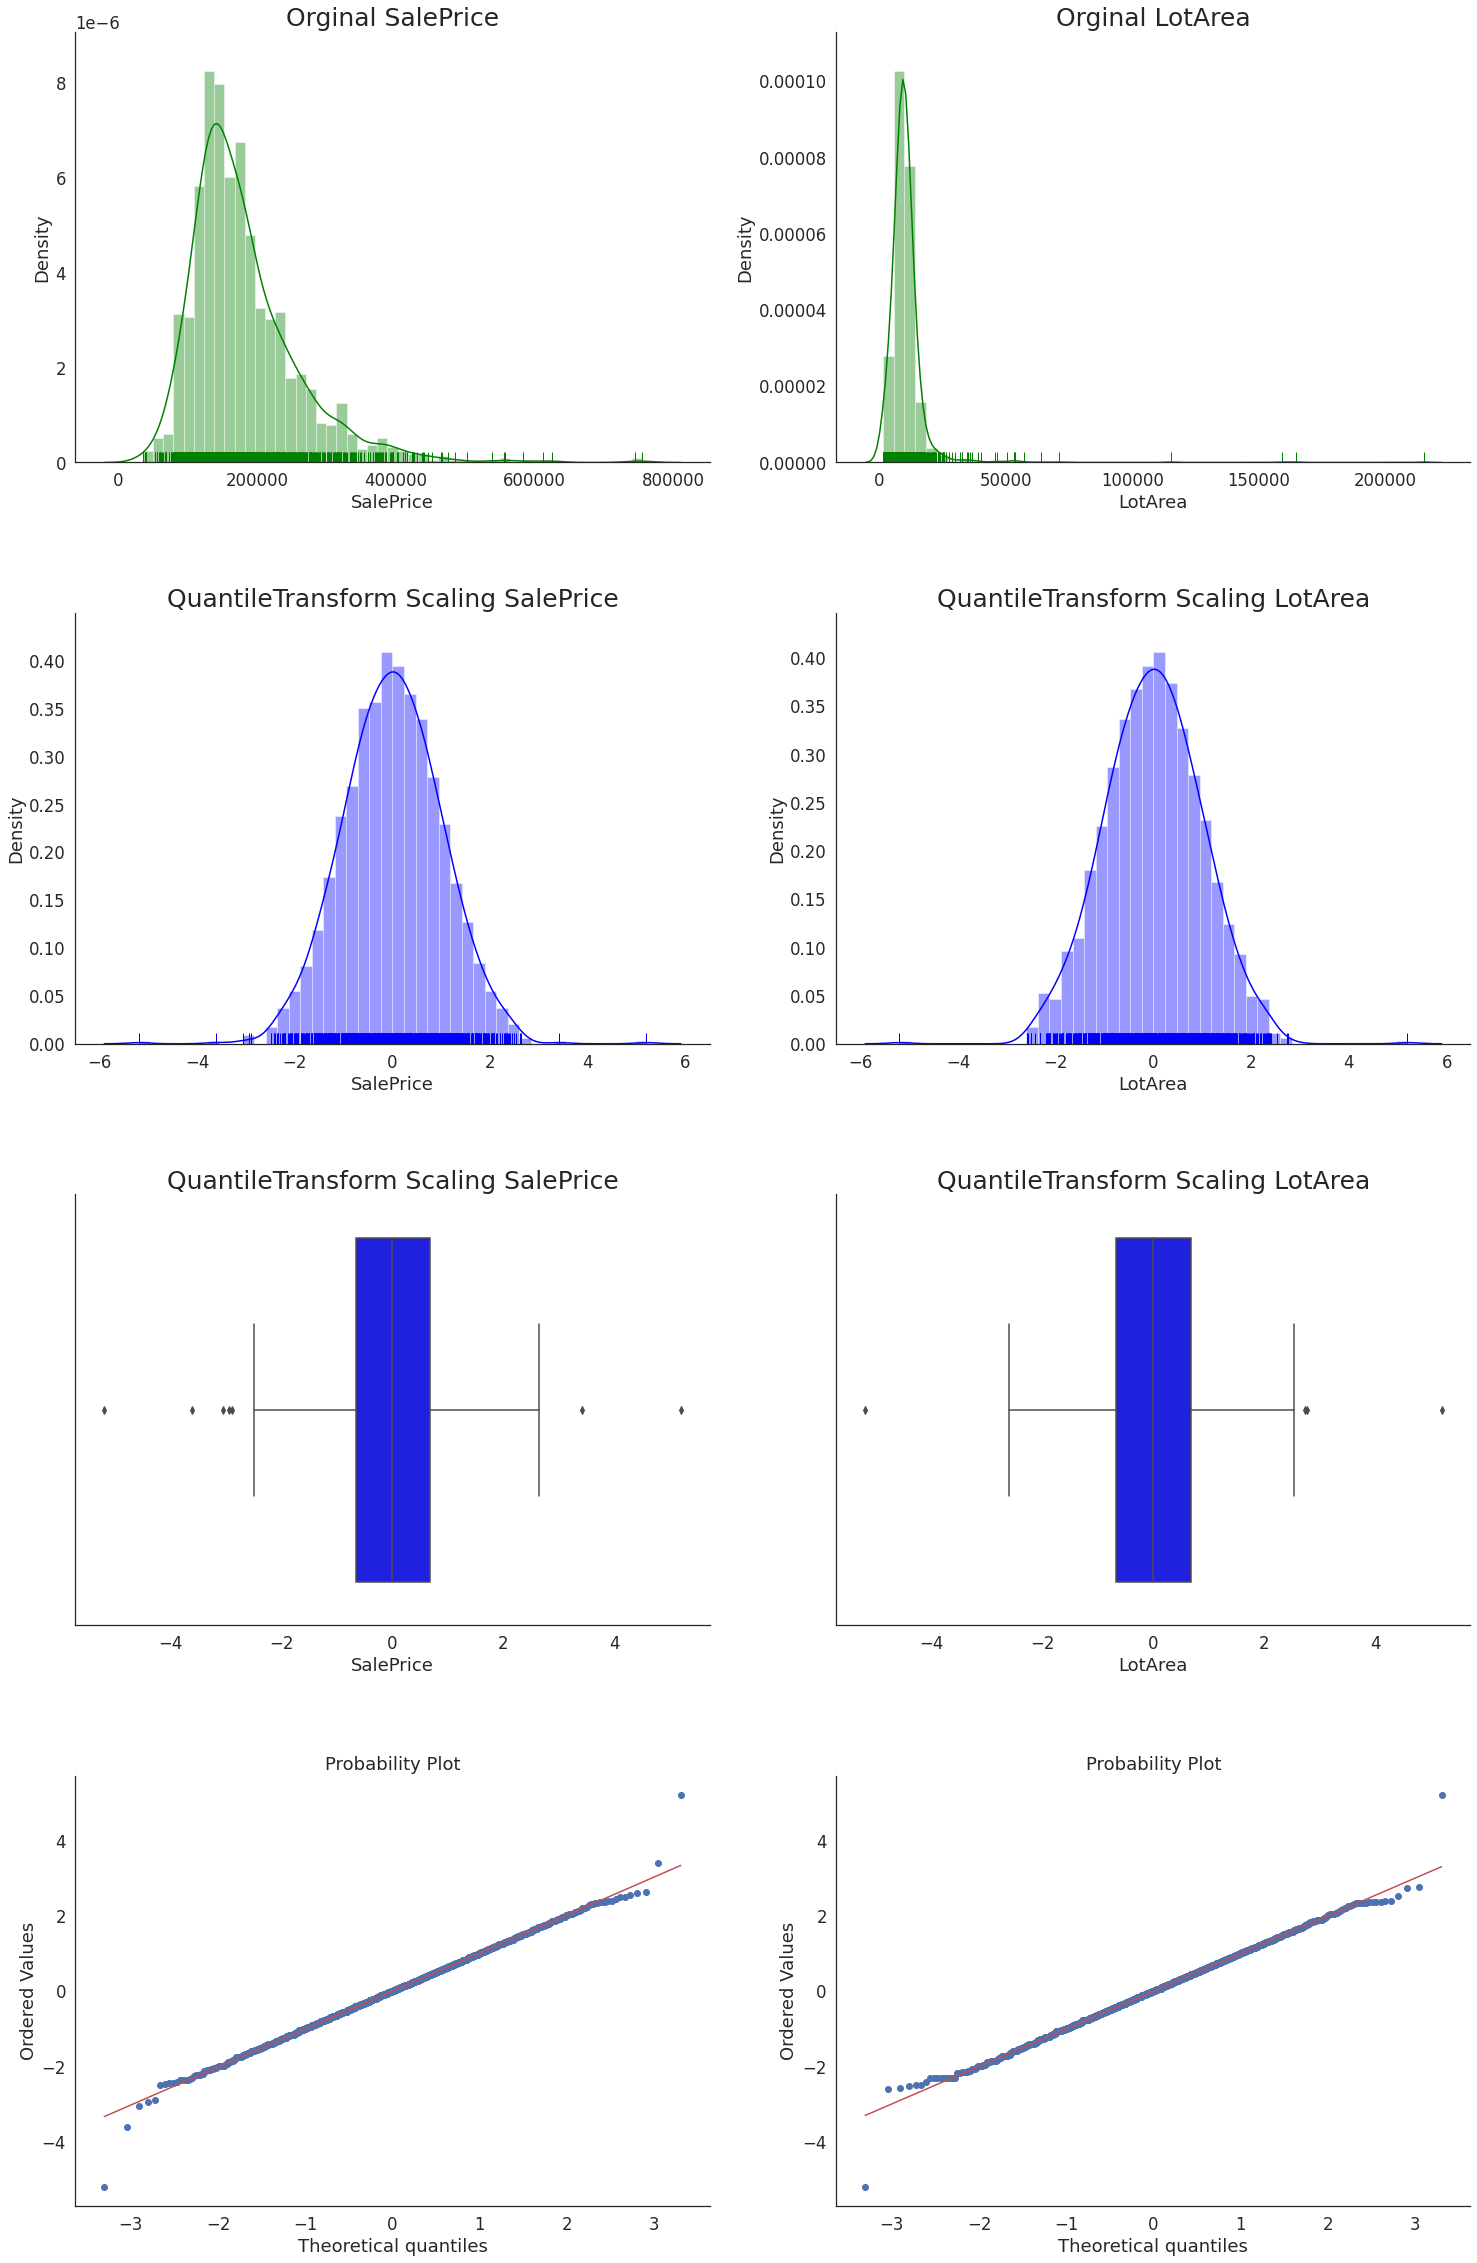

In [ ]:
from sklearn.preprocessing import QuantileTransformer
train_x = train_org.copy()

rcParams['figure.figsize'] = 25,40
fig, axes = plt.subplots(4, 2)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.35)

transformer = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
for i in range(2):
    train_x.loc[:,num_cols[i]] = transformer.fit_transform(train_x[[num_cols[i]]])
    sns.distplot(train_org.loc[:,num_cols[i]],ax=axes[0,i],rug=True,color='green')
    axes[0,i].set_title('Orginal '+num_cols[i],fontsize=25)
    sns.distplot(train_x.loc[:,num_cols[i]],ax=axes[1,i],rug=True,color='blue')
    axes[1,i].set_title('QuantileTransform Scaling '+num_cols[i],fontsize=25)
    sns.boxplot(train_x.loc[:,num_cols[i]],ax=axes[2,i],color='blue')
    axes[2,i].set_title('QuantileTransform Scaling '+num_cols[i],fontsize=25)
    stats.probplot(train_x[num_cols[i]],plot = axes[3,i])
    sns.despine()

In [ ]:
display_stat()

SalePrice:
mean: -0.0003, std: 1.0103, skew: -0.0192, kurtosis: 0.6690 
LotArea:
mean: -0.0010, std: 1.0010, skew: -0.0004, kurtosis: 0.5342 


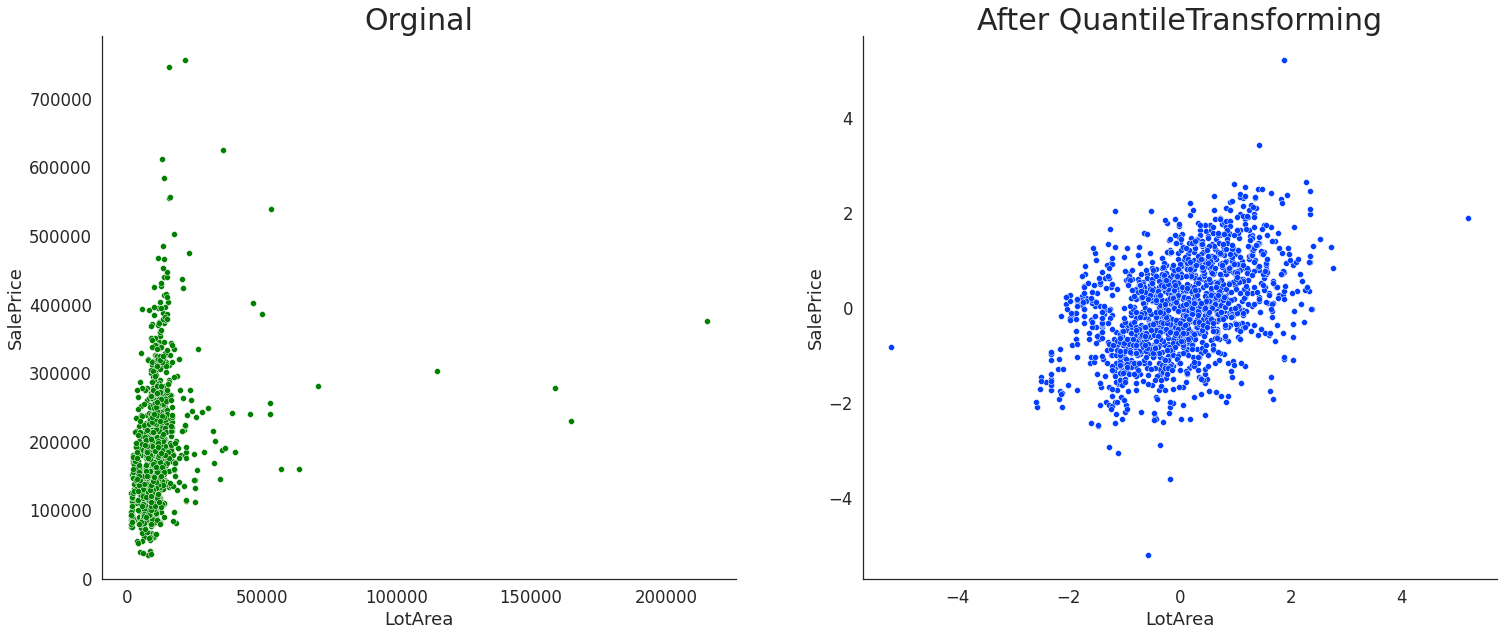

In [ ]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("bright")
rcParams['figure.figsize'] = 25,10
ax1 = plt.subplot(1,2,1)  
ax2 = plt.subplot(1,2,2)  
sns.scatterplot(data=train_org, y="SalePrice", x="LotArea",ax=ax1,color='green')
ax1.set_title('Orginal',fontsize=30)
sns.scatterplot(data =train_x, y="SalePrice", x="LotArea",ax=ax2)
ax2.set_title('After QuantileTransforming',fontsize=30)
sns.despine()

#Conclusion

It is not easy to obtain meaningful information from data and process features with it. However, in order to increase the predictive power, it is often necessary to properly process the features. To do this, it is necessary to first observe the features and figure out the distribution of the features.

The distribution of features can be a key to solving a problem and a starting point to better understand the collected data. In general, a distribution in the form of a gaussian distribution can be said to be a good distribution. If the distribution of features is not skewed, it is likely that linear scaling should be performed, otherwise, non-linear scaling should be performed.

However, there may be guides in the work of processing features, but there does not seem to be an answer. Understanding the data well and processing it accordingly will be the best solution.